## Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
sys.setrecursionlimit(5000)
import seaborn as sns; sns.set(color_codes=True)
mpl.style.use('default')
import scipy.stats as stats
import requests
from io import StringIO
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.stats import chi2
import statsmodels.stats.multitest as mt

import matplotlib.font_manager
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

## Output files

In [19]:
#!delete
# Most of the code accesses my internal file structure. 
# I am outputing all the raw data used for the analyses here.
# For example, instead of using the inbuilt function: readInEnrichmentNoLog(input_folder) to read in 
# heritability enrichment, access the heritability enrichments in the ./partitioned_h2/ folder

# i.e. replace this:
# enr = readInEnrichmentNoLog('browning_nean_h2')[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']]
# with this:
# enr = pd.read_csv("/paper/data/partitioned_h2/introgressedRegions_enrichment.tsv", sep='\t',index_col=0)[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']]

#"/data/partitioned_h2/introgressedRegions_enrichment.tsv"
readInEnrichmentNoLog('browning_nean_h2')[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']].loc[list(traits_41)].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/introgressedRegions_enrichment.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/introgressedSNPs_enrichment.tsv"
readInEnrichmentNoLog('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed','ALL1KG_NMATCH_sprime_results.bed','ALLEUR_sprime_results.bed','ALL1KG_sprime_results.bed']].loc[list(traits_41)].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/introgressedSNPs_enrichment.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/introgressedRegions_stderr.tsv"
readInEnrichmentStdErr('browning_nean_h2')[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']].loc[list(traits_41)].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/introgressedRegions_stderr.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/introgressedSNPs_stderr.tsv"
readInEnrichmentStdErr('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed','ALL1KG_NMATCH_sprime_results.bed','ALLEUR_sprime_results.bed','ALL1KG_sprime_results.bed']].loc[list(traits_41)].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/introgressedSNPs_stderr.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/introgressedRegions_pval.tsv"
readInEnrichmentPval('browning_nean_h2')[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']].loc[list(traits_41)].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/introgressedRegions_pval.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/introgressedSNPs_pval.tsv"
readInEnrichmentPval('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed','ALL1KG_NMATCH_sprime_results.bed','ALLEUR_sprime_results.bed','ALL1KG_sprime_results.bed']].loc[list(traits_41)].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/introgressedSNPs_pval.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/UKBB_introgressedSNPs_enrichment.tsv"
readInEnrichmentNoLogUKBB('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed','ALL1KG_NMATCH_sprime_results.bed','ALLEUR_sprime_results.bed','ALL1KG_sprime_results.bed']].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/UKBB_introgressedSNPs_enrichment.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/UKBB_introgressedSNPs_stderr.tsv"
readInEnrichmentStdErrUKBB('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed','ALL1KG_NMATCH_sprime_results.bed','ALLEUR_sprime_results.bed','ALL1KG_sprime_results.bed']].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/UKBB_introgressedSNPs_stderr.tsv", sep='\t',index=True,header=True)

#"/data/partitioned_h2/UKBB_introgressedSNPs_pval.tsv"
readInEnrichmentPvalUKBB('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed','ALL1KG_NMATCH_sprime_results.bed','ALLEUR_sprime_results.bed','ALL1KG_sprime_results.bed']].to_csv("/dors/capra_lab/users/evonne/nean_h2/paper/data/partitioned_h2/UKBB_introgressedSNPs_pval.tsv", sep='\t',index=True,header=True)


In [3]:
class partitioned_h2(): 
    ''' Input partitioned heritabilty (S-LDSC) data'''
    def __init__(self, input): #input options = #introgressedRegions #introgressed_SNPs #UKBB_introgressedSNPs
        self.input = "../paper/data/partitioned_h2/" + input 
    def enr(self):
        return(pd.read_csv(self.input + "_enrichment.tsv", sep='\t',index_col=0))
    def stderr(self):
        return(pd.read_csv(self.input + "_stderr.tsv", sep='\t',index_col=0))
    def pval(self):
        return(pd.read_csv(self.input + "_pval.tsv", sep='\t',index_col=0))

#Example
partitioned_h2("introgressedSNPs").enr().head()

,ALLEUR_NMATCH_sprime_results.bed,ALL1KG_NMATCH_sprime_results.bed,ALLEUR_sprime_results.bed,ALL1KG_sprime_results.bed
0,,,,
CrohnsDz,1.102749,0.688538,0.799770,0.554532
EosinophilCount,1.527566,1.473647,0.941626,0.923507
T2D2,1.197119,1.061028,0.791146,0.759389
MenarcheAge,0.888051,0.830518,0.759130,0.745924
HairColor,1.935420,1.533057,1.196361,1.047467


## Input: Neanderthal introgressed regions/SNPs

,0
count,4764.000000
mean,115.723132
std,107.396481
min,30.000000
25%,51.000000
50%,82.000000
75%,140.000000
max,1378.000000


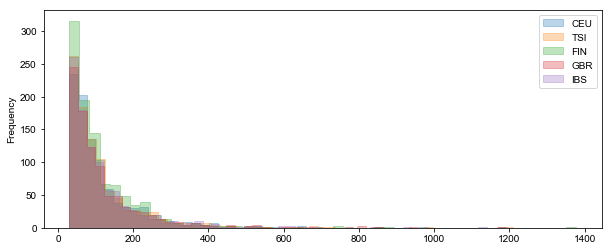

In [2]:
# Number of variants comparable to Altai neanderthal (threshold = 30+)
all_segments = []
for i in ['CEU','TSI','FIN','GBR','IBS']:
    segments = pd.read_csv('../paper/data/input_neanderthal_regions/' + i + '_sprime_segments_neanMatchingFilter.bed',sep='\t',header=None)
    segments.columns = ['chr','start','end','nmatch','nmismatch','nnoncomp']
    ax = (segments['nmatch'] + segments['nmismatch']).plot.hist(bins=50, histtype='step', alpha = 0.3, fill=True,figsize=(10,4))
    all_segments.append(segments['nmatch'] + segments['nmismatch'])
ax.legend(['CEU','TSI','FIN','GBR','IBS','ALLEUR'])
#plt.savefig("/home/mcarthe/BrowningSegmentMetadata_A.pdf")

pd.DataFrame([item for sublist in all_segments for item in sublist]).describe()

,0
count,4764.000000
mean,0.758253
std,0.133341
min,0.300000
25%,0.690476
50%,0.780000
75%,0.853242
max,1.000000


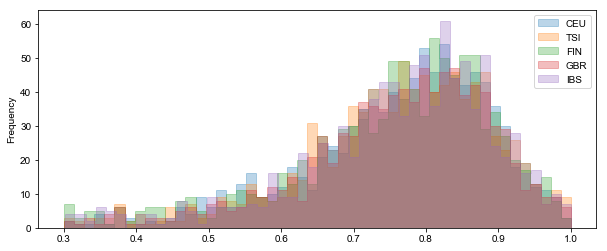

In [4]:
# % of variants that match the altai neanderthal (threshold 0.3+)
all_segments = []
for i in ['CEU','TSI','FIN','GBR','IBS']:
    segments = pd.read_csv('../paper/data/input_neanderthal_regions/' + i + '_sprime_segments_neanMatchingFilter.bed',sep='\t',header=None)
    segments.columns = ['chr','start','end','nmatch','nmismatch','nnoncomp']
    ax = (segments['nmatch']/(segments['nmatch'] + segments['nmismatch'])).plot.hist(bins=50, histtype='step', alpha = 0.3, fill=True,figsize=(10,4))
    all_segments.append(segments['nmatch']/(segments['nmatch'] + segments['nmismatch']))
ax.legend(['CEU','TSI','FIN','GBR','IBS','ALLEUR'])
#plt.savefig("/home/mcarthe/BrowningSegmentMetadata_B.pdf")

pd.DataFrame([item for sublist in all_segments for item in sublist]).describe()

1345

count    1.345000e+03
mean     4.705607e+05
std      4.908633e+05
min      1.566100e+04
25%      1.744000e+05
50%      2.986360e+05
75%      5.735050e+05
max      4.572508e+06
dtype: float64

0.1977825490625

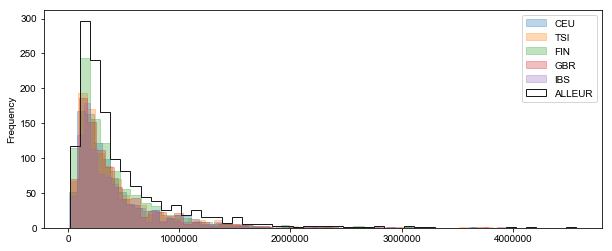

In [5]:
# Len & number of browning segments that match the neanderthal filter
for i in ['CEU','TSI','FIN','GBR','IBS','ALLEUR']:
    segments = pd.read_csv('../paper/data/input_neanderthal_regions/' + i + '_sprime_segments_neanMatchingFilter.bed',sep='\t',header=None)
    if i == 'ALLEUR':
        len(segments)
        segments.columns = ['chr','start','end']
        ax = (segments['end'] - segments['start']).plot.hist(bins=50, histtype='step', alpha = 1, fill=False, color='k',figsize=(10,4))
        (segments['end'] - segments['start']).describe()
        (segments['end'] - segments['start']).sum()/3200000000
    else:
        segments.columns = ['chr','start','end','nmatch','nmismatch','nnoncomp']
        ax = (segments['end'] - segments['start']).plot.hist(bins=50, histtype='step', alpha = 0.3, fill=True,figsize=(10,4))

ax.legend(['CEU','TSI','FIN','GBR','IBS','ALLEUR'])
#plt.savefig("/home/mcarthe/BrowningSegmentMetadata_C.pdf")


## Fig1. Heritability analysis from LSDC for 41 traits

### Functions

In [2]:
#!delete

def readInPropSnps(nameOfFolder):
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[1::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [3]:
def readInPropH2(nameOfFolder):
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[2::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [4]:
def readInPropH2_se(nameOfFolder):
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[3::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [14]:
def readInEnrichmentNoLog(nameOfFolder):
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[4::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [3]:
def readInEnrichmentStdErr(nameOfFolder, withCoeff=True):
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[5::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [4]:
def readInEnrichmentPval(nameOfFolder, withCoeff=True):
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[6::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

### Legend

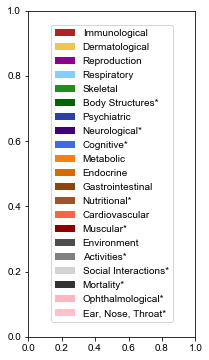

In [6]:
#Create legend with colors for the trait domains
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='firebrick',label='Immunological'),
Patch(facecolor='#ebc849',label='Dermatological'),
Patch(facecolor='#88048c',label='Reproduction'),
Patch(facecolor='lightskyblue',label='Respiratory'),
Patch(facecolor='forestgreen',label='Skeletal'),
Patch(facecolor='darkgreen',label='Body Structures*'),
Patch(facecolor='#2a42a1',label='Psychiatric'),
Patch(facecolor='#3d0373',label='Neurological*'),
Patch(facecolor='royalblue',label='Cognitive*'),
Patch(facecolor='C1',label='Metabolic'),
Patch(facecolor='#d16d08',label='Endocrine'),
Patch(facecolor='saddlebrown',label='Gastrointestinal'),
Patch(facecolor='sienna',label='Nutritional*'),
Patch(facecolor='tomato',label='Cardiovascular'),
Patch(facecolor='darkred',label='Muscular*'),
Patch(facecolor='.3',label='Environment'),
Patch(facecolor='gray',label='Activities*'),
Patch(facecolor='lightgray',label='Social Interactions*'),
Patch(facecolor='.2',label='Mortality*'),
Patch(facecolor='lightpink',label='Ophthalmological*'),
Patch(facecolor='pink',label='Ear, Nose, Throat*')]

# Create the figure
fig, ax = plt.subplots(figsize=(3,6))
ax.legend(handles=legend_elements, loc='center')

#plt.savefig("/home/mcarthe/fig1legend.pdf")


In [16]:
# 8 traits with extra analyses:
traits8 = ['AutoimmuneDz','Balding','MenopauseAge','Sunburn','FVC','Heel_T_Score','MorningPerson','WBCCount']

# colors for the 41 traits from LDSC
traits_41 = {'SystolicBP': 'tomato',
'SkinColor': '#ebc849',
'Balding': '#ebc849',
'HairColor': '#ebc849',
'Sunburn': '#ebc849',
'Tanning': '#ebc849',
'Eczema': '#ebc849',
'DermDz': '#ebc849',
'T2D2': '#d16d08',
'Hypothyroidism': '#d16d08',
'YearsOfEd2': '.3',
'UC': 'saddlebrown',
'CrohnsDz': 'saddlebrown',
'AutoimmuneDz': 'firebrick',
'RBCCount': 'firebrick',
'EosinophilCount': 'firebrick',
'PlateletCount': 'firebrick',
'WBCCount': 'firebrick',
'RDW': 'firebrick',
'BMI2': 'C1',
'WaistHipRatio': 'C1',
'HDL': 'C1',
'LDL': 'C1',
'HighCholesterol': 'C1',
'MorningPerson': '#2a42a1',
'ASD': '#2a42a1',
'Schizophrenia': '#2a42a1',
'Anorexia': '#2a42a1',
'SmokingStatus': '#2a42a1',
'DepressiveSxs': '#2a42a1',
'Neuroticism': '#2a42a1',
'FirstBirthAge': '#88048c',
'NumChildrenBorn': '#88048c',
'MenarcheAge': '#88048c',
'MenopauseAge': '#88048c',
'FVC': 'lightskyblue',
'Resp_ENT_Dz': 'lightskyblue',
'FEV1_FVC_Ratio': 'lightskyblue',
'Heel_T_Score': 'forestgreen',
'RA': 'forestgreen',
'Height2': 'forestgreen'}

In [12]:
enr.head()
#fig, ax = plt.subplots(figsize=(4, 3))
#g = sns.swarmplot(y = 'value',x=0 ,data = enr, hue='id', ax=ax)

,id,variable,value
0,Hypothyroidism,SNPs_in_ALLEUR_sprime_segments_neanMatchingFil...,0.787521
1,HairColor,SNPs_in_ALLEUR_sprime_segments_neanMatchingFil...,0.985502
2,Height2,SNPs_in_ALLEUR_sprime_segments_neanMatchingFil...,0.894757
3,Eczema,SNPs_in_ALLEUR_sprime_segments_neanMatchingFil...,0.954348
4,UC,SNPs_in_ALLEUR_sprime_segments_neanMatchingFil...,0.872808


### Fig 1A

,SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed,SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed
count,41.000000,41.000000
mean,0.911784,0.951202
std,0.104543,0.116470
min,0.715961,0.726459
25%,0.867204,0.904352
50%,0.884690,0.932318
75%,0.945629,0.993808
max,1.252273,1.345589


,SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed,SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed
0,,
SkinColor,1.213917,1.271221
Sunburn,1.164782,1.237980
Tanning,1.252273,1.345589


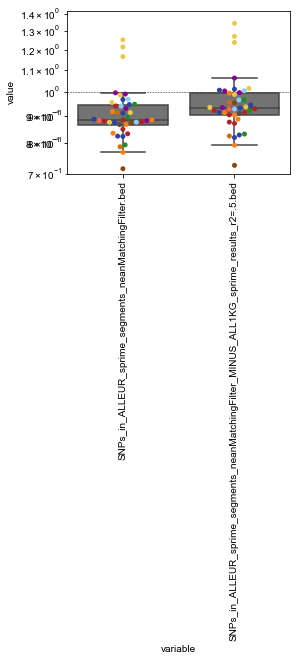

In [15]:
enr = partitioned_h2("introgressedRegions").enr()[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']]
enr = enr.loc[list(traits_41)]
enr.describe()
enr[enr['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed'] > 1.1] # for manual annotation
enr["id"] = enr.index
enr = pd.melt(enr, id_vars=['id'])
fig, ax = plt.subplots(figsize=(4, 3))
g = sns.swarmplot(y = 'value',x='variable' ,data = enr, hue='id',palette=traits_41, ax=ax)
g = sns.boxplot(y='value',x='variable',data=enr, color='.45', showfliers=False,ax=ax)

_ = g.get_legend().remove()
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.set(yscale="log")
_ = g.set(ylim=(.70, 1.42))
_ = g.set(yticks=[0.8, 0.9, 1, 1.1, 1.2,1.3,1.4])
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

#plt.savefig("/home/mcarthe/fig1a.pdf")


In [16]:
enr = partitioned_h2("introgressedRegions").enr()[['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed', 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']]
enr = enr.loc[list(traits_41)]
enr = np.log(enr)
t = np.mean(enr)/(np.std(enr,ddof=1)/np.sqrt(len(enr)))
pval = 2*stats.t.cdf(-abs(t),len(enr)-1)
print('P values for heritability depletion in Fig 1A')
pval

P values for heritability depletion in Fig 1A


array([8.05887005e-07, 2.98869809e-03])

### Fig 1B

10

31

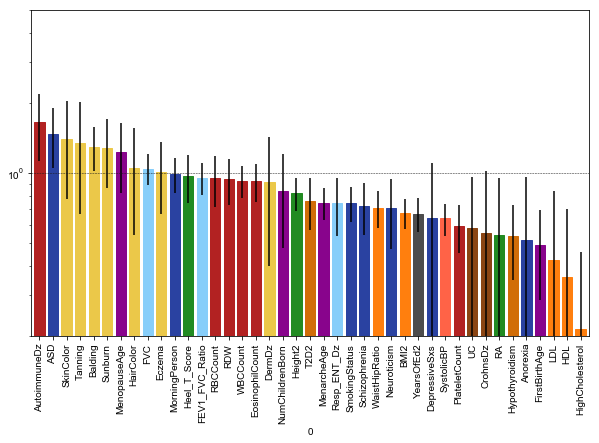

In [18]:
enr = partitioned_h2("introgressedSNPs").enr()[['ALL1KG_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
len(enr[enr['ALL1KG_sprime_results.bed'] > 1])
len(enr[enr['ALL1KG_sprime_results.bed'] < 1])
stderr = partitioned_h2('introgressedSNPs').stderr()[['ALL1KG_sprime_results.bed']]
order = enr.transpose().mean().sort_values(ascending=False).index
colors = [traits_41[x] for x in list(enr.loc[order]['ALL1KG_sprime_results.bed'].index)]

ax = enr.loc[order].plot.bar(figsize=(10,6), yerr = stderr.loc[order], width=0.75)
_ = ax.set_ylim(1/5, 5)
_ = ax.set(yscale="log")
_ = ax.get_legend().remove()
_ = ax.axhline(y=1, color='k', linestyle="--", linewidth=.5)


for i in range(41):
    _ = ax.get_children()[i+1].set_color(colors[i])

#plt.savefig("/home/mcarthe/fig1b.pdf")
# Manually edited to center bottom of bars to 1 

plt.show()



In [19]:
enr = partitioned_h2("introgressedSNPs").enr()[['ALL1KG_sprime_results.bed']].loc[traits_41]
pval = partitioned_h2("introgressedSNPs").pval()[['ALL1KG_sprime_results.bed']].loc[traits_41]

print("Traits with significant depletion in introgressed variants, q value:")
qval = mt.multipletests(list(pval.iloc[:,0]), alpha=0.05, method='fdr_bh')[1]
for i in zip(pval[qval < 0.05].index, np.round(qval[qval < 0.05],5)):
    i

print("Original p value:")
pval[qval < 0.05]
print("Fold depletion:")
1/enr[qval < 0.05][['ALL1KG_sprime_results.bed']]

Traits with significant depletion in introgressed variants, q value:


('PlateletCount', 0.03566)

('BMI2', 0.01875)

('HighCholesterol', 0.01875)

('YearsOfEd2', 0.03566)

('SystolicBP', 0.01497)

Original p value:


,ALL1KG_sprime_results.bed
0,
PlateletCount,0.004349
BMI2,0.000957
HighCholesterol,0.001372
YearsOfEd2,0.004126
SystolicBP,0.000365


Fold depletion:


,ALL1KG_sprime_results.bed
0,
PlateletCount,1.687554
BMI2,1.489019
HighCholesterol,4.685574
YearsOfEd2,1.493661
SystolicBP,1.567053


### Fig 1C

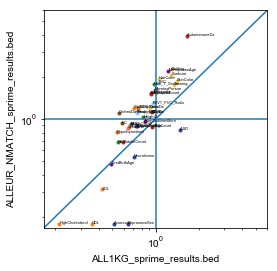

Set 1 traits, % enrichment:


0.5365853658536586

Set 1 traits, % depletion:


0.4634146341463415

% of traits that are more enriched in Set 1 than Set 4:


0.7804878048780488

% of traits that are less enriched in Set 1 than Set 4:


0.21951219512195122

In [20]:
enr = partitioned_h2("introgressedSNPs").enr()[['ALL1KG_sprime_results.bed','ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
enr[enr < 1/6] = 1/6+0.01
colors = [traits_41[x] for x in list(enr[['ALLEUR_NMATCH_sprime_results.bed']].index)]

ax = enr.plot.scatter(x='ALL1KG_sprime_results.bed',y='ALLEUR_NMATCH_sprime_results.bed',figsize=(4,4), color = (0,0,0,0))

for i,type in enumerate(list(enr.index)):
    _ = plt.scatter(enr[['ALL1KG_sprime_results.bed']].iloc[i,0],enr[['ALLEUR_NMATCH_sprime_results.bed']].iloc[i,0], marker='.', color=colors[i]);
    _ = plt.text(enr[['ALL1KG_sprime_results.bed']].iloc[i,0]+0.001, enr[['ALLEUR_NMATCH_sprime_results.bed']].iloc[i,0]+0.001, list(enr.index)[i], fontsize=4);


plt.plot([0.125,8],[0.125,8])
_ = ax.set(yscale="log")
_ = ax.set(xscale="log")
_ = ax.axhline(y=1)
_ = ax.axvline(x=1)
_ = ax.set_ylim(1/6, 6)
_ = ax.set_xlim(1/6, 6)

#plt.savefig("/home/mcarthe/fig1c.pdf")
plt.show()

print('Set 1 traits, % enrichment:')
len(enr[enr['ALLEUR_NMATCH_sprime_results.bed'] > 1]) / 41
print('Set 1 traits, % depletion:')
len(enr[enr['ALLEUR_NMATCH_sprime_results.bed'] < 1]) / 41

print('% of traits that are more enriched in Set 1 than Set 4:')
len(enr[enr['ALLEUR_NMATCH_sprime_results.bed'] > enr['ALL1KG_sprime_results.bed']]) / 41
print('% of traits that are less enriched in Set 1 than Set 4:')
len(enr[enr['ALLEUR_NMATCH_sprime_results.bed'] < enr['ALL1KG_sprime_results.bed']]) / 41

Enrichment mean for each set:


/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


ALL1KG_sprime_results.bed           0.782700
ALLEUR_NMATCH_sprime_results.bed    1.152678
dtype: float64

Enrichment median for each set:


ALL1KG_sprime_results.bed           0.759389
ALLEUR_NMATCH_sprime_results.bed    1.102346
dtype: float64

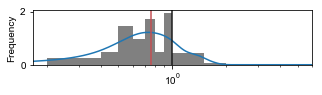

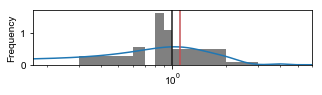

In [21]:
enr = partitioned_h2("introgressedSNPs").enr()[['ALL1KG_sprime_results.bed','ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
xx = np.linspace(1/6, 6, 1000)

print("Enrichment mean for each set:")
10**(np.log10(enr).mean())

print("Enrichment median for each set:")
enr.median()

ax = enr[['ALL1KG_sprime_results.bed']].plot(kind='hist', color='gray',figsize = (5,1),logx=True, density=True,bins=[1/6,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6])
_ = ax.set_xlim(1/6, 6)

kde = stats.gaussian_kde(list(enr.loc[:,'ALL1KG_sprime_results.bed']))
_ = ax.plot(xx, kde(xx))
_ = ax.axvline(x=1, color='k')
_ = ax.axvline(x=enr.median().loc['ALL1KG_sprime_results.bed'],color='r')
_ = ax.get_legend().remove()
plt.savefig("/home/mcarthe/fig1c_xhist.pdf")
plt.show()

ax = enr[['ALLEUR_NMATCH_sprime_results.bed']].plot(kind='hist',color = 'gray',figsize = (5,1), logx=True, density=True, bins=[1/6,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6])
_ = ax.set_xlim(1/6, 6)
kde = stats.gaussian_kde(list(enr.loc[:,'ALLEUR_NMATCH_sprime_results.bed']))
_ = ax.plot(xx, kde(xx))
_ = ax.axvline(x=1, color='k')
_ = ax.axvline(x=enr.median().loc['ALLEUR_NMATCH_sprime_results.bed'],color='r')
_ = ax.get_legend().remove()
#plt.savefig("/home/mcarthe/fig1c_yhist.pdf")
plt.show()


In [22]:
partitioned_h2("introgressedSNPs").pval()[['ALLEUR_NMATCH_sprime_results.bed']].loc[traits8].sort_values(by='ALLEUR_NMATCH_sprime_results.bed')


,ALLEUR_NMATCH_sprime_results.bed
0,
AutoimmuneDz,0.028079
Balding,0.068322
FVC,0.068588
WBCCount,0.100488
Heel_T_Score,0.126291
MorningPerson,0.174077
Sunburn,0.208197
MenopauseAge,0.292534


### Supplemental - Sets 1-4 Introgressed variants

22

19

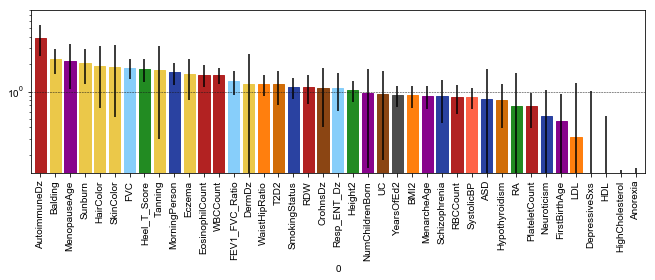

In [26]:
# Set 1
enr = partitioned_h2("introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
len(enr[enr['ALLEUR_NMATCH_sprime_results.bed'] > 1])
len(enr[enr['ALLEUR_NMATCH_sprime_results.bed'] < 1])
stderr = partitioned_h2("introgressedSNPs").stderr()[['ALLEUR_NMATCH_sprime_results.bed']]
order = enr.transpose().mean().sort_values(ascending=False).index
colors = [traits_41[x] for x in list(enr.loc[order]['ALLEUR_NMATCH_sprime_results.bed'].index)]

ax = enr.loc[order].plot.bar(figsize=(11,3), yerr = stderr.loc[order], width=0.75)
_ = ax.set_ylim(1/8, 8)
_ = ax.set(yscale="log")
_ = ax.get_legend().remove()
_ = ax.axhline(y=1, color='k', linestyle="--", linewidth=.5)


for i in range(41):
    _ = ax.get_children()[i+1].set_color(colors[i])


#plt.savefig("/home/mcarthe/H2enrichmentOtherSets_Aupdate.pdf")


22

19

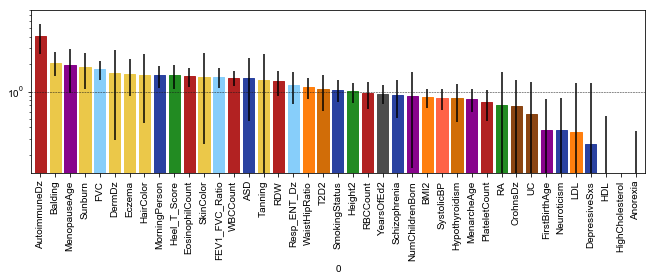

In [27]:
# Set 2
enr =partitioned_h2("introgressedSNPs").enr()[['ALL1KG_NMATCH_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
len(enr[enr['ALL1KG_NMATCH_sprime_results.bed'] > 1])
len(enr[enr['ALL1KG_NMATCH_sprime_results.bed'] < 1])
stderr = partitioned_h2("introgressedSNPs").stderr()[['ALL1KG_NMATCH_sprime_results.bed']]
order = enr.transpose().mean().sort_values(ascending=False).index
colors = [traits_41[x] for x in list(enr.loc[order]['ALL1KG_NMATCH_sprime_results.bed'].index)]

ax = enr.loc[order].plot.bar(figsize=(11,3), yerr = stderr.loc[order], width=0.75)
_ = ax.set_ylim(1/8, 8)
_ = ax.set(yscale="log")
_ = ax.get_legend().remove()
_ = ax.axhline(y=1, color='k', linestyle="--", linewidth=.5)


for i in range(41):
    _ = ax.get_children()[i+1].set_color(colors[i])


#plt.savefig("/home/mcarthe/H2enrichmentOtherSets_Bupdate.pdf")


11

30

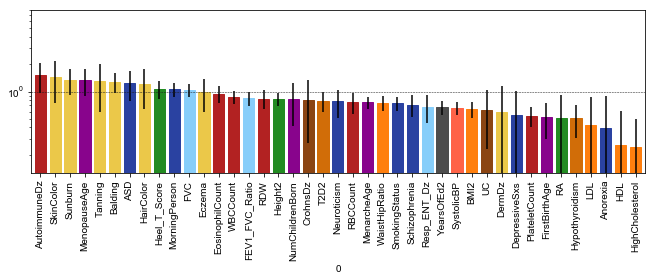

In [28]:
# Set 3
enr = partitioned_h2("introgressedSNPs").enr()[['ALLEUR_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
len(enr[enr['ALLEUR_sprime_results.bed'] > 1])
len(enr[enr['ALLEUR_sprime_results.bed'] < 1])
stderr = partitioned_h2("introgressedSNPs").stderr()[['ALLEUR_sprime_results.bed']]
order = enr.transpose().mean().sort_values(ascending=False).index
colors = [traits_41[x] for x in list(enr.loc[order]['ALLEUR_sprime_results.bed'].index)]

ax = enr.loc[order].plot.bar(figsize=(11,3), yerr = stderr.loc[order], width=0.75)
_ = ax.set_ylim(1/8, 8)
_ = ax.set(yscale="log")
_ = ax.get_legend().remove()
_ = ax.axhline(y=1, color='k', linestyle="--", linewidth=.5)


for i in range(41):
    _ = ax.get_children()[i+1].set_color(colors[i])


#plt.savefig("/home/mcarthe/H2enrichmentOtherSets_Cupdate.pdf")


10

31

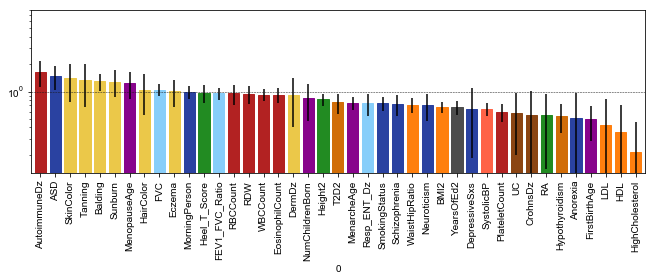

In [29]:
# Set 4
enr = partitioned_h2("introgressedSNPs").enr()[['ALL1KG_sprime_results.bed']]
enr = enr.loc[list(traits_41)]
len(enr[enr['ALL1KG_sprime_results.bed'] > 1])
len(enr[enr['ALL1KG_sprime_results.bed'] < 1])
stderr = partitioned_h2("introgressedSNPs").stderr()[['ALL1KG_sprime_results.bed']]
order = enr.transpose().mean().sort_values(ascending=False).index
colors = [traits_41[x] for x in list(enr.loc[order]['ALL1KG_sprime_results.bed'].index)]

ax = enr.loc[order].plot.bar(figsize=(11,3), yerr = stderr.loc[order], width=0.75)
_ = ax.set_ylim(1/8, 8)
_ = ax.set(yscale="log")
_ = ax.get_legend().remove()
_ = ax.axhline(y=1, color='k', linestyle="--", linewidth=.5)


for i in range(41):
    _ = ax.get_children()[i+1].set_color(colors[i])


#plt.savefig("/home/mcarthe/H2enrichmentOtherSets_Dupdate.pdf")


### Supplemental - Vernot16

,Neanderthal introgressed haplotypes
count,41.000000
mean,0.926947
std,0.094867
min,0.655400
25%,0.873852
50%,0.931752
75%,0.976927
max,1.128338


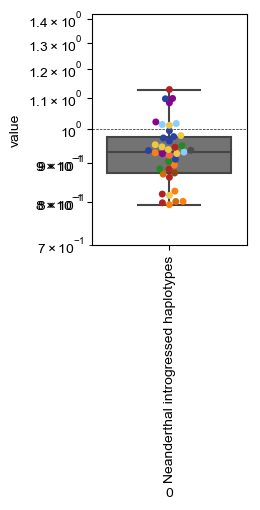

In [459]:
#! fix
enr = readInEnrichmentNoLog('neanderthal_and_HARs_2')[['Neanderthal introgressed haplotypes']]#, 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']]
enr = enr.loc[list(color_41)]
enr.describe()
#enr[enr['SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter.bed'] > 1.1] # for manual annotation
enr["id"] = enr.index
enr = pd.melt(enr, id_vars=['id'])
fig, ax = plt.subplots(figsize=(2, 3))
g = sns.swarmplot(y = 'value',x=0 ,data = enr, hue='id',palette=color_41, ax=ax)
g = sns.boxplot(y='value',x=0,data=enr, color='.45', showfliers=False,ax=ax)

_ = g.get_legend().remove()
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.set(yscale="log")
_ = g.set(ylim=(.70, 1.42))
_ = g.set(yticks=[0.8, 0.9, 1, 1.1, 1.2,1.3,1.4])
_ = g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.savefig("/home/mcarthe/VernotReplicateA.pdf")


In [17]:
enr = readInEnrichmentNoLog('neanderthal_and_HARs_2')[['Neanderthal introgressed haplotypes']]#, 'SNPs_in_ALLEUR_sprime_segments_neanMatchingFilter_MINUS_ALL1KG_sprime_results_r2=.5.bed']]
enr = enr.loc[list(traits_41)]
enr = np.log(enr)
t = np.mean(enr)/(np.std(enr,ddof=1)/np.sqrt(len(enr)))
pval = 2*stats.t.cdf(-abs(t),len(enr)-1)
print('P values for heritability depletion')
pval

P values for heritability depletion


array([1.44553459e-05])

17

24

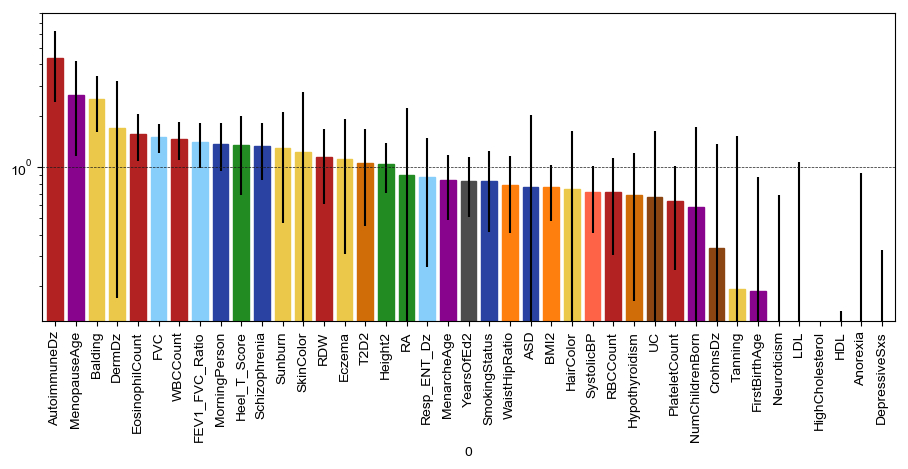

In [457]:
enr = readInEnrichmentNoLog('neanderthal_and_HARs_2')[['132,296 Neanderthal SNPs']]
enr = enr.loc[list(color_41)]
len(enr[enr['132,296 Neanderthal SNPs'] > 1])
len(enr[enr['132,296 Neanderthal SNPs'] < 1])
stderr = readInEnrichmentStdErr('neanderthal_and_HARs_2')[['132,296 Neanderthal SNPs']]
order = enr.transpose().mean().sort_values(ascending=False).index
colors = [color_41[x] for x in list(enr.loc[order]['132,296 Neanderthal SNPs'].index)]

ax = enr.loc[order].plot.bar(figsize=(11,4), yerr = stderr.loc[order], width=0.75)
_ = ax.set_ylim(1/8, 8)
_ = ax.set(yscale="log")
_ = ax.get_legend().remove()
_ = ax.axhline(y=1, color='k', linestyle="--", linewidth=.5)


for i in range(41):
    _ = ax.get_children()[i+1].set_color(colors[i])

plt.savefig("/home/mcarthe/VernotReplicateB.pdf")


0.7910486930594183

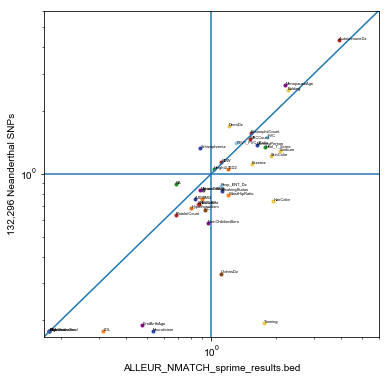

In [111]:
enr = readInEnrichmentNoLog('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed']].loc[list(color_41)]
enr = pd.concat([enr, readInEnrichmentNoLog('neanderthal_and_HARs_2')[['132,296 Neanderthal SNPs']].loc[list(color_41)]],axis=1)
enr[['ALLEUR_NMATCH_sprime_results.bed','132,296 Neanderthal SNPs']].corr().loc['ALLEUR_NMATCH_sprime_results.bed','132,296 Neanderthal SNPs']**2
enr[enr < 1/6] = 1/6+0.01
colors = [color_41[x] for x in list(enr[['ALLEUR_NMATCH_sprime_results.bed']].index)]

ax = enr.plot.scatter(x='ALLEUR_NMATCH_sprime_results.bed',y='132,296 Neanderthal SNPs',figsize=(6,6), color = (0,0,0,0))

for i,type in enumerate(list(enr.index)):
    _ = plt.scatter(enr[['ALLEUR_NMATCH_sprime_results.bed']].iloc[i,0],enr[['132,296 Neanderthal SNPs']].iloc[i,0], marker='.', color=colors[i]);
    _ = plt.text(enr[['ALLEUR_NMATCH_sprime_results.bed']].iloc[i,0]+0.001, enr[['132,296 Neanderthal SNPs']].iloc[i,0]+0.001, list(enr.index)[i], fontsize=4);


plt.plot([0.125,8],[0.125,8])
_ = ax.set(yscale="log")
_ = ax.set(xscale="log")
_ = ax.axhline(y=1)
_ = ax.axvline(x=1)
_ = ax.set_ylim(1/6, 6)
_ = ax.set_xlim(1/6, 6)


plt.savefig("/home/mcarthe/VernotReplicateC.pdf")
#plt.show()

## Fig 2. Heritability analysis from LSDC for 400+ UKBB traits

### Function & Domain-descriptions per trait

In [9]:
#! delete
def readInEnrichmentNoLogUKBB(nameOfFolder, withCoeff=True):
    if withCoeff == True:
        numCols = 10
    else:
        numCols = 7
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output_UKBB/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[4::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [18]:
def readInEnrichmentStdErrUKBB(nameOfFolder, withCoeff=True):
    if withCoeff == True:
        numCols = 10
    else:
        numCols = 7
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output_UKBB/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[5::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [10]:
def readInEnrichmentPvalUKBB(nameOfFolder, withCoeff=True):
    if withCoeff == True:
        numCols = 10
    else:
        numCols = 7
    df = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/output_UKBB/aggregate_' + nameOfFolder + '.results',sep='\t',header=None,index_col=0)
    df_subset = df[df.columns[6::10]]
    colnames = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/results/' + nameOfFolder + '/input/key.txt',sep='\t',header=None)
    df_subset.columns = colnames[0]
    return(df_subset)

In [494]:
enr = readInEnrichmentNoLogUKBB('browning_nean_h2')[['ALLEUR_sprime_results.bed']]
pval = readInEnrichmentPvalUKBB('browning_nean_h2')[['ALLEUR_sprime_results.bed']]

enr['pval'] = pval.loc[:,'ALLEUR_sprime_results.bed']
#pval = readInEnrichmentPvalUKBB('browning_nean_h2')[['ALLEUR_NMATCH_sprime_results.bed']]
enr.to_csv("UKBB_enr_pval.tsv",sep="\t",)
len(enr[(enr['pval'] < 0.05)])

106

In [31]:
#domain/chapter/subchapter designations for each trait
sumstats_domain = pd.read_csv("/dors/capra_lab/users/evonne/LDSC/data/GWAS_UKB_neale/sumstat_domains_finalplusImmunoSubchapters.txt",sep="\t")
sumstats_domain.head()

,Trait_code,Trait_name,Domain,ChapterLevel,SubchapterLevel,OriginalFileName,EvonneFileName
0,102_irnt,"Pulse rate, automated reading",Cardiovascular,"Functions of the Cardiovascular, Haematologica...",Heart Functions,102_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz,"Pulse_rate,_automated_reading.102_irnt.bgz"
1,1050,Time spend outdoors in summer,Activities,Self-Care,Looking After One's Health,1050.ldsc.imputed_v3.both_sexes.tsv.bgz,Time_spend_outdoors_in_summer.1050.bgz
2,1060,Time spent outdoors in winter,Activities,Self-Care,Looking After One's Health,1060.ldsc.imputed_v3.both_sexes.tsv.bgz,Time_spent_outdoors_in_winter.1060.bgz
3,1070,Time spent watching television (TV),Activities,Self-Care,Looking After One's Health,1070.ldsc.imputed_v3.both_sexes.tsv.bgz,Time_spent_watching_television_TV.1070.bgz
4,1080,Time spent using computer,Activities,Self-Care,Looking After One's Health,1080.ldsc.imputed_v3.both_sexes.tsv.bgz,Time_spent_using_computer.1080.bgz


### Fig 2A

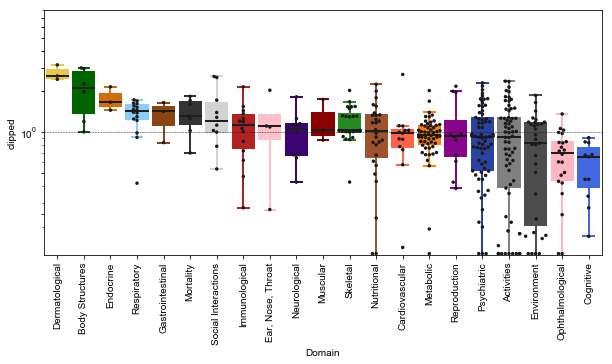

In [65]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Activities': 'gray',
'Body Structures': 'darkgreen',
'Cardiovascular': 'tomato',
'Cognitive': 'royalblue',
'Dermatological': '#ebc849',
'Ear, Nose, Throat': 'pink',
'Endocrine': '#d16d08',
'Environment': '.3',
'Gastrointestinal': 'saddlebrown',
'Immunological': 'firebrick',
'Metabolic': 'C1',
'Mortality': '.2',
'Muscular': 'darkred',
'Neurological': '#3d0373',
'Nutritional': 'sienna',
'Ophthalmological': 'lightpink',
'Psychiatric': '#2a42a1',
'Reproduction': '#88048c',
'Respiratory': 'lightskyblue',
'Skeletal': 'forestgreen',
'Social Interactions': 'lightgray'}

fig, ax = plt.subplots(figsize=(10, 4.5))
domain_order = list(domain.groupby('Domain')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='Domain', y='ALLEUR_NMATCH_sprime_results.bed', data=domain, order = domain_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='Domain', y='clipped', data=domain, color="k", size=3.5,order=domain_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
#plt.savefig("/home/mcarthe/fig2a.pdf")

In [39]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
sum(enr['ALLEUR_NMATCH_sprime_results.bed'] < 1)
sum(enr['ALLEUR_NMATCH_sprime_results.bed'] > 1)

208

197

### Suppl table of Enrichment & significance

In [91]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain_enrichments = []
for i in domain['Domain'].unique():
    enr = domain[domain['Domain'] == i].loc[:,'ALLEUR_NMATCH_sprime_results.bed']
    median = np.median(list(enr))
    enr[enr < 0] = 0.000497 #set to min > 0
    enr = np.log(list(enr))
    t = np.mean(enr)/(np.std(enr,ddof=1)/np.sqrt(len(enr)))
    pval = np.round(2*stats.t.cdf(-abs(t),len(enr)-1),4)
    mean = np.exp(np.mean(list(enr)))
    domain_enrichments.append({'trait':i,'enrichment_median':median,'enrichment_mean':mean,'pval':pval,'n':len(enr)})
domain_enrichments = pd.DataFrame(domain_enrichments).sort_values(by='enrichment_median',ascending=False)
domain_enrichments['mean_fold-depletion'] = domain_enrichments['enrichment_mean'].apply(lambda x: 1/x if x < 1 else np.nan)
domain_enrichments['median_fold-depletion'] = domain_enrichments['enrichment_median'].apply(lambda x: 1/x if x < 1 else np.nan)
domain_enrichments.head()
domain_enrichments[['trait','enrichment_median','median_fold-depletion','enrichment_mean','mean_fold-depletion','pval','n']].to_csv("/home/mcarthe/DomainTable.tsv",sep="\t",index=None,na_rep='NA')

,enrichment_mean,enrichment_median,n,pval,trait,mean_fold-depletion,median_fold-depletion
18,2.719080,2.602125,3,0.0055,Dermatological,NaN,NaN
17,1.907194,2.134909,6,0.0181,Body Structures,NaN,NaN
11,1.738293,1.667765,3,0.0415,Endocrine,NaN,NaN
9,1.290739,1.429355,16,0.0106,Respiratory,NaN,NaN
12,1.255548,1.424572,3,0.3852,Gastrointestinal,NaN,NaN


In [94]:
domain.head()

,EvonneFileName,ALLEUR_NMATCH_sprime_results.bed,Trait_code,Trait_name,Domain,ChapterLevel,SubchapterLevel,OriginalFileName
0,3mm_cylindrical_power_left.5119_irnt.bgz,-0.945158,5119_irnt,3mm cylindrical power (left),Ophthalmological,"The Eye, Ear and Related Structures",Structure of Eyeball,5119_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz
1,3mm_cylindrical_power_right.5116_irnt.bgz,0.421875,5116_irnt,3mm cylindrical power (right),Ophthalmological,"The Eye, Ear and Related Structures",Structure of Eyeball,5116_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz
2,3mm_strong_meridian_angle_left.5104_irnt.bgz,0.000989,5104_irnt,3mm strong meridian angle (left),Ophthalmological,"The Eye, Ear and Related Structures",Structure of Eyeball,5104_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz
3,3mm_strong_meridian_left.5135_irnt.bgz,0.738676,5135_irnt,3mm strong meridian (left),Ophthalmological,"The Eye, Ear and Related Structures",Structure of Eyeball,5135_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz
4,3mm_strong_meridian_right.5132_irnt.bgz,0.775471,5132_irnt,3mm strong meridian (right),Ophthalmological,"The Eye, Ear and Related Structures",Structure of Eyeball,5132_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz


In [95]:
# Same thing but for subchapters
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain_enrichments = []
for i in domain['SubchapterLevel'].unique():
    enr = domain[domain['SubchapterLevel'] == i].loc[:,'ALLEUR_NMATCH_sprime_results.bed']
    median = np.median(list(enr))
    enr[enr < 0] = 0.000497 #set to min > 0
    enr = np.log(list(enr))
    t = np.mean(enr)/(np.std(enr,ddof=1)/np.sqrt(len(enr)))
    pval = np.round(2*stats.t.cdf(-abs(t),len(enr)-1),4)
    mean = np.exp(np.mean(list(enr)))
    domain_enrichments.append({'trait':i,'enrichment_median':median,'enrichment_mean':mean,'pval':pval,'n':len(enr)})
domain_enrichments = pd.DataFrame(domain_enrichments).sort_values(by='enrichment_median',ascending=False)
domain_enrichments['mean_fold-depletion'] = domain_enrichments['enrichment_mean'].apply(lambda x: 1/x if x < 1 else np.nan)
domain_enrichments['median_fold-depletion'] = domain_enrichments['enrichment_median'].apply(lambda x: 1/x if x < 1 else np.nan)
domain_enrichments.head()
domain_enrichments[['trait','enrichment_median','median_fold-depletion','enrichment_mean','mean_fold-depletion','pval','n']].to_csv("/home/mcarthe/SubchapterTable.tsv",sep="\t",index=None,na_rep='NA')

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcou

,enrichment_mean,enrichment_median,n,pval,trait,mean_fold-depletion,median_fold-depletion
41,2.719080,2.602125,3,0.0055,Functions of Hair,NaN,NaN
45,2.163797,2.163797,1,NaN,Endocrine Gland Functions,NaN,NaN
58,1.604010,2.004929,3,0.2197,"Disorders of Puberty, Not Elsewhere Classified",NaN,NaN
35,1.320232,1.784281,2,0.7910,Superficial Injuries Involving Multiple Body R...,NaN,NaN
48,1.747761,1.747761,1,NaN,Control of Voluntary Movement Functions,NaN,NaN


### Supplemental Figures

#### Domain Level

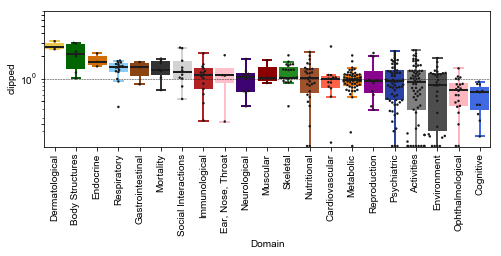

In [66]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Activities': 'gray',
'Body Structures': 'darkgreen',
'Cardiovascular': 'tomato',
'Cognitive': 'royalblue',
'Dermatological': '#ebc849',
'Ear, Nose, Throat': 'pink',
'Endocrine': '#d16d08',
'Environment': '.3',
'Gastrointestinal': 'saddlebrown',
'Immunological': 'firebrick',
'Metabolic': 'C1',
'Mortality': '.2',
'Muscular': 'darkred',
'Neurological': '#3d0373',
'Nutritional': 'sienna',
'Ophthalmological': 'lightpink',
'Psychiatric': '#2a42a1',
'Reproduction': '#88048c',
'Respiratory': 'lightskyblue',
'Skeletal': 'forestgreen',
'Social Interactions': 'lightgray'}

fig, ax = plt.subplots(figsize=(8, 2.5))
g = sns.boxplot(x='Domain', y='ALLEUR_NMATCH_sprime_results.bed', data=domain, order = domain_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='Domain', y='clipped', data=domain, color="k", size=2.5,order=domain_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Domain_A.pdf")

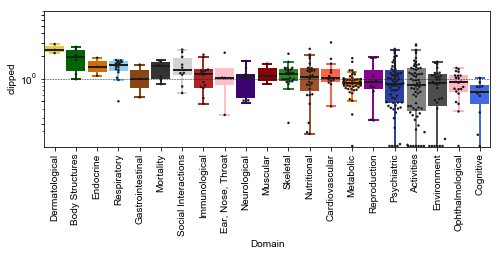

In [67]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALL1KG_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALL1KG_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Activities': 'gray',
'Body Structures': 'darkgreen',
'Cardiovascular': 'tomato',
'Cognitive': 'royalblue',
'Dermatological': '#ebc849',
'Ear, Nose, Throat': 'pink',
'Endocrine': '#d16d08',
'Environment': '.3',
'Gastrointestinal': 'saddlebrown',
'Immunological': 'firebrick',
'Metabolic': 'C1',
'Mortality': '.2',
'Muscular': 'darkred',
'Neurological': '#3d0373',
'Nutritional': 'sienna',
'Ophthalmological': 'lightpink',
'Psychiatric': '#2a42a1',
'Reproduction': '#88048c',
'Respiratory': 'lightskyblue',
'Skeletal': 'forestgreen',
'Social Interactions': 'lightgray'}

fig, ax = plt.subplots(figsize=(8, 2.5))
g = sns.boxplot(x='Domain', y='ALL1KG_NMATCH_sprime_results.bed', data=domain, order = domain_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='Domain', y='clipped', data=domain, color="k", size=2.5,order=domain_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Domain_B.pdf")

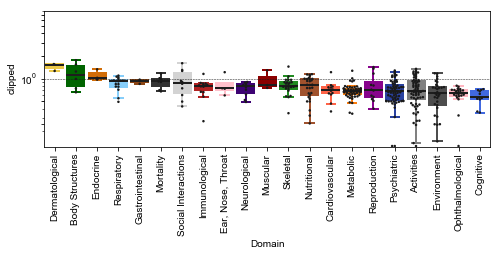

In [68]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_sprime_results.bed'].clip(.127,7.8)
colors = {'Activities': 'gray',
'Body Structures': 'darkgreen',
'Cardiovascular': 'tomato',
'Cognitive': 'royalblue',
'Dermatological': '#ebc849',
'Ear, Nose, Throat': 'pink',
'Endocrine': '#d16d08',
'Environment': '.3',
'Gastrointestinal': 'saddlebrown',
'Immunological': 'firebrick',
'Metabolic': 'C1',
'Mortality': '.2',
'Muscular': 'darkred',
'Neurological': '#3d0373',
'Nutritional': 'sienna',
'Ophthalmological': 'lightpink',
'Psychiatric': '#2a42a1',
'Reproduction': '#88048c',
'Respiratory': 'lightskyblue',
'Skeletal': 'forestgreen',
'Social Interactions': 'lightgray'}

fig, ax = plt.subplots(figsize=(8, 2.5))
g = sns.boxplot(x='Domain', y='ALLEUR_sprime_results.bed', data=domain, order = domain_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='Domain', y='clipped', data=domain, color="k", size=2.5,order=domain_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Domain_C.pdf")

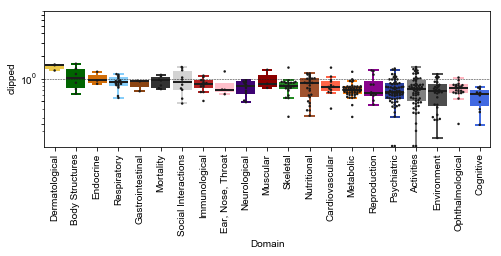

In [69]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALL1KG_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALL1KG_sprime_results.bed'].clip(.127,7.8)
colors = {'Activities': 'gray',
'Body Structures': 'darkgreen',
'Cardiovascular': 'tomato',
'Cognitive': 'royalblue',
'Dermatological': '#ebc849',
'Ear, Nose, Throat': 'pink',
'Endocrine': '#d16d08',
'Environment': '.3',
'Gastrointestinal': 'saddlebrown',
'Immunological': 'firebrick',
'Metabolic': 'C1',
'Mortality': '.2',
'Muscular': 'darkred',
'Neurological': '#3d0373',
'Nutritional': 'sienna',
'Ophthalmological': 'lightpink',
'Psychiatric': '#2a42a1',
'Reproduction': '#88048c',
'Respiratory': 'lightskyblue',
'Skeletal': 'forestgreen',
'Social Interactions': 'lightgray'}

fig, ax = plt.subplots(figsize=(8, 2.5))
g = sns.boxplot(x='Domain', y='ALL1KG_sprime_results.bed', data=domain, order = domain_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='Domain', y='clipped', data=domain, color="k", size=2.5,order=domain_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Domain_D.pdf")

#### Subchapter Level

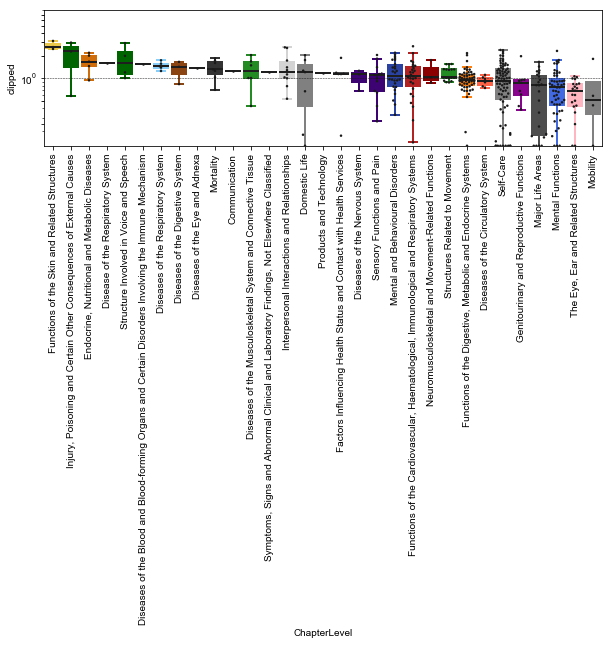

In [72]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Domestic Life': 'gray',
'Mobility': 'gray',
'Self-Care': 'gray',
'Injury, Poisoning and Certain Other Consequences of External Causes': 'darkgreen',
'Structure Involved in Voice and Speech': 'darkgreen',
'Diseases of the Circulatory System': 'tomato',
'Mental Functions': 'royalblue',
'Functions of the Skin and Related Structures': '#ebc849',
'Endocrine, Nutritional and Metabolic Diseases': '#d16d08',
'Factors Influencing Health Status and Contact with Health Services': '.3',
'Major Life Areas': '.3',
'Products and Technology': '.3',
'Diseases of the Digestive System': 'saddlebrown',
'Diseases of the Blood and Blood-forming Organs and Certain Disorders Involving the Immune Mechanism': 'firebrick',
'Functions of the Cardiovascular, Haematological, Immunological and Respiratory Systems': 'firebrick',
'Functions of the Digestive, Metabolic and Endocrine Systems': 'C1',
'Mortality': '.2',
'Neuromusculoskeletal and Movement-Related Functions': 'darkred',
'Diseases of the Nervous System': '#3d0373',
'Sensory Functions and Pain': '#3d0373',
'Diseases of the Eye and Adnexa': 'lightpink',
'The Eye, Ear and Related Structures': 'lightpink',
'Mental and Behavioural Disorders': '#2a42a1',
'Genitourinary and Reproductive Functions': '#88048c',
'Disease of the Respiratory System': 'lightskyblue',
'Diseases of the Respiratory System': 'lightskyblue',
'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified': 'lightskyblue',
'Diseases of the Musculoskeletal System and Connective Tissue': 'forestgreen',
'Structures Related to Movement': 'forestgreen',
'Interpersonal Interactions and Relationships': 'lightgray',
'Communication': 'gray'
}


fig, ax = plt.subplots(figsize=(10, 2.5))
chapter_order = list(domain.groupby('ChapterLevel')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='ChapterLevel', y='ALLEUR_NMATCH_sprime_results.bed', data=domain, order = chapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='ChapterLevel', y='clipped', data=domain, color="k", size=2.5,order=chapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Chapter_A.pdf")

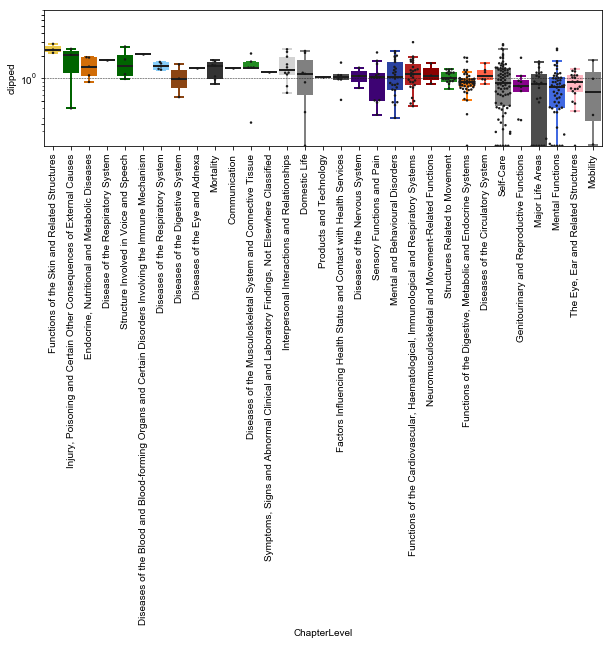

In [73]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALL1KG_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALL1KG_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Domestic Life': 'gray',
'Mobility': 'gray',
'Self-Care': 'gray',
'Injury, Poisoning and Certain Other Consequences of External Causes': 'darkgreen',
'Structure Involved in Voice and Speech': 'darkgreen',
'Diseases of the Circulatory System': 'tomato',
'Mental Functions': 'royalblue',
'Functions of the Skin and Related Structures': '#ebc849',
'Endocrine, Nutritional and Metabolic Diseases': '#d16d08',
'Factors Influencing Health Status and Contact with Health Services': '.3',
'Major Life Areas': '.3',
'Products and Technology': '.3',
'Diseases of the Digestive System': 'saddlebrown',
'Diseases of the Blood and Blood-forming Organs and Certain Disorders Involving the Immune Mechanism': 'firebrick',
'Functions of the Cardiovascular, Haematological, Immunological and Respiratory Systems': 'firebrick',
'Functions of the Digestive, Metabolic and Endocrine Systems': 'C1',
'Mortality': '.2',
'Neuromusculoskeletal and Movement-Related Functions': 'darkred',
'Diseases of the Nervous System': '#3d0373',
'Sensory Functions and Pain': '#3d0373',
'Diseases of the Eye and Adnexa': 'lightpink',
'The Eye, Ear and Related Structures': 'lightpink',
'Mental and Behavioural Disorders': '#2a42a1',
'Genitourinary and Reproductive Functions': '#88048c',
'Disease of the Respiratory System': 'lightskyblue',
'Diseases of the Respiratory System': 'lightskyblue',
'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified': 'lightskyblue',
'Diseases of the Musculoskeletal System and Connective Tissue': 'forestgreen',
'Structures Related to Movement': 'forestgreen',
'Interpersonal Interactions and Relationships': 'lightgray',
'Communication': 'gray'
}


fig, ax = plt.subplots(figsize=(10, 2.5))
g = sns.boxplot(x='ChapterLevel', y='ALL1KG_NMATCH_sprime_results.bed', data=domain, order = chapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='ChapterLevel', y='clipped', data=domain, color="k", size=2.5,order=chapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Chapter_B.pdf")

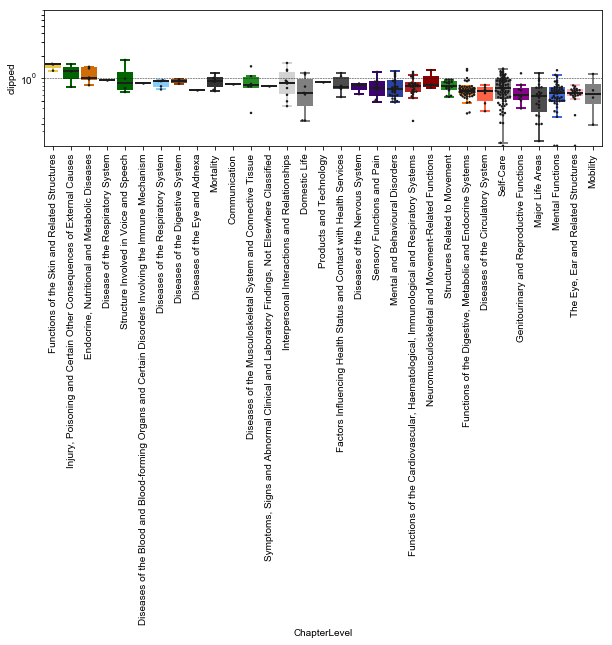

In [74]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_sprime_results.bed'].clip(.127,7.8)
colors = {'Domestic Life': 'gray',
'Mobility': 'gray',
'Self-Care': 'gray',
'Injury, Poisoning and Certain Other Consequences of External Causes': 'darkgreen',
'Structure Involved in Voice and Speech': 'darkgreen',
'Diseases of the Circulatory System': 'tomato',
'Mental Functions': 'royalblue',
'Functions of the Skin and Related Structures': '#ebc849',
'Endocrine, Nutritional and Metabolic Diseases': '#d16d08',
'Factors Influencing Health Status and Contact with Health Services': '.3',
'Major Life Areas': '.3',
'Products and Technology': '.3',
'Diseases of the Digestive System': 'saddlebrown',
'Diseases of the Blood and Blood-forming Organs and Certain Disorders Involving the Immune Mechanism': 'firebrick',
'Functions of the Cardiovascular, Haematological, Immunological and Respiratory Systems': 'firebrick',
'Functions of the Digestive, Metabolic and Endocrine Systems': 'C1',
'Mortality': '.2',
'Neuromusculoskeletal and Movement-Related Functions': 'darkred',
'Diseases of the Nervous System': '#3d0373',
'Sensory Functions and Pain': '#3d0373',
'Diseases of the Eye and Adnexa': 'lightpink',
'The Eye, Ear and Related Structures': 'lightpink',
'Mental and Behavioural Disorders': '#2a42a1',
'Genitourinary and Reproductive Functions': '#88048c',
'Disease of the Respiratory System': 'lightskyblue',
'Diseases of the Respiratory System': 'lightskyblue',
'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified': 'lightskyblue',
'Diseases of the Musculoskeletal System and Connective Tissue': 'forestgreen',
'Structures Related to Movement': 'forestgreen',
'Interpersonal Interactions and Relationships': 'lightgray',
'Communication': 'gray'
}


fig, ax = plt.subplots(figsize=(10, 2.5))
g = sns.boxplot(x='ChapterLevel', y='ALLEUR_sprime_results.bed', data=domain, order = chapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='ChapterLevel', y='clipped', data=domain, color="k", size=2.5,order=chapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Chapter_C.pdf")

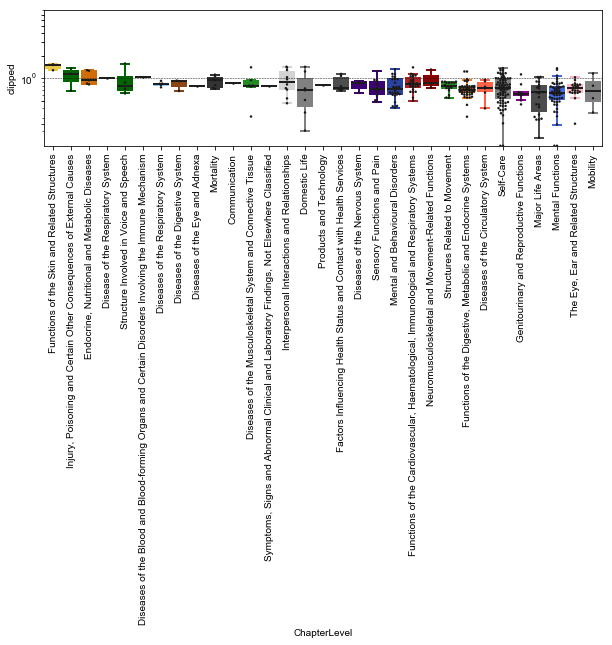

In [75]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALL1KG_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALL1KG_sprime_results.bed'].clip(.127,7.8)
colors = {'Domestic Life': 'gray',
'Mobility': 'gray',
'Self-Care': 'gray',
'Injury, Poisoning and Certain Other Consequences of External Causes': 'darkgreen',
'Structure Involved in Voice and Speech': 'darkgreen',
'Diseases of the Circulatory System': 'tomato',
'Mental Functions': 'royalblue',
'Functions of the Skin and Related Structures': '#ebc849',
'Endocrine, Nutritional and Metabolic Diseases': '#d16d08',
'Factors Influencing Health Status and Contact with Health Services': '.3',
'Major Life Areas': '.3',
'Products and Technology': '.3',
'Diseases of the Digestive System': 'saddlebrown',
'Diseases of the Blood and Blood-forming Organs and Certain Disorders Involving the Immune Mechanism': 'firebrick',
'Functions of the Cardiovascular, Haematological, Immunological and Respiratory Systems': 'firebrick',
'Functions of the Digestive, Metabolic and Endocrine Systems': 'C1',
'Mortality': '.2',
'Neuromusculoskeletal and Movement-Related Functions': 'darkred',
'Diseases of the Nervous System': '#3d0373',
'Sensory Functions and Pain': '#3d0373',
'Diseases of the Eye and Adnexa': 'lightpink',
'The Eye, Ear and Related Structures': 'lightpink',
'Mental and Behavioural Disorders': '#2a42a1',
'Genitourinary and Reproductive Functions': '#88048c',
'Disease of the Respiratory System': 'lightskyblue',
'Diseases of the Respiratory System': 'lightskyblue',
'Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified': 'lightskyblue',
'Diseases of the Musculoskeletal System and Connective Tissue': 'forestgreen',
'Structures Related to Movement': 'forestgreen',
'Interpersonal Interactions and Relationships': 'lightgray',
'Communication': 'gray'
}


fig, ax = plt.subplots(figsize=(10, 2.5))
g = sns.boxplot(x='ChapterLevel', y='ALL1KG_sprime_results.bed', data=domain, order = chapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='ChapterLevel', y='clipped', data=domain, color="k", size=2.5,order=chapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Chapter_D.pdf")

#### Subchapter level

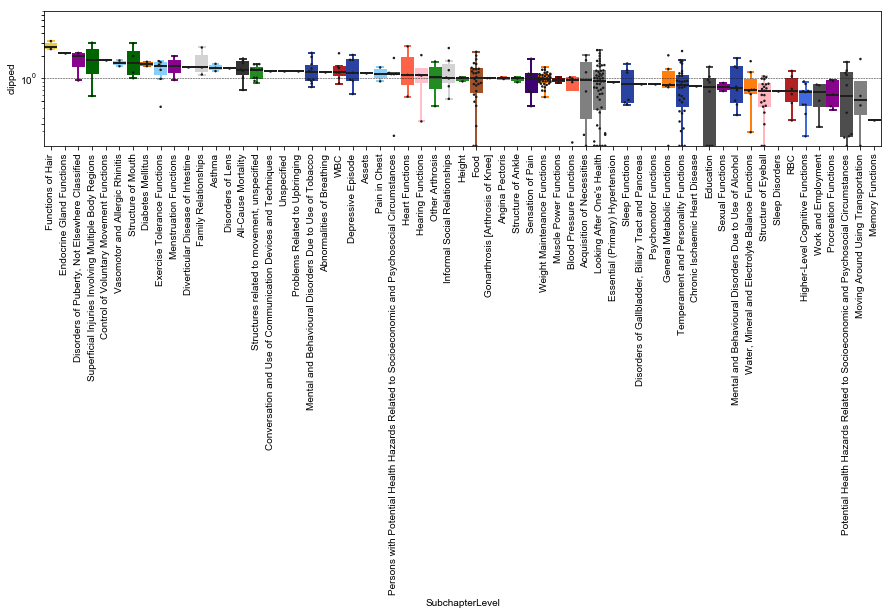

In [80]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Acquisition of Necessities': 'gray',
'Conversation and Use of Communication Devices and Techniques': 'gray',
'Looking After One\'s Health': 'gray',
'Moving Around Using Transportation': 'gray',
'Unspecified': 'gray',
'Structure of Mouth': 'darkgreen',
'Superficial Injuries Involving Multiple Body Regions': 'darkgreen',
'Angina Pectoris': 'tomato',
'Blood Pressure Functions': 'tomato',
'Chronic Ischaemic Heart Disease': 'tomato',
'Essential (Primary) Hypertension': 'tomato',
'Heart Functions': 'tomato',
'Higher-Level Cognitive Functions': 'royalblue',
'Memory Functions': 'royalblue',
'Psychomotor Functions': 'royalblue',
'Functions of Hair': '#ebc849',
'Hearing Functions': 'pink',
'Diabetes Mellitus': '#d16d08',
'Endocrine Gland Functions': '#d16d08',
'Assets': '.3',
'Education': '.3',
'Persons with Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Problems Related to Upbringing': '.3',
'Work and Employment': '.3',
'Disorders of Gallbladder, Biliary Tract and Pancreas': 'saddlebrown',
'Diverticular Disease of Intestine': 'saddlebrown',
'WBC': 'firebrick',
'RBC': 'firebrick',
'General Metabolic Functions': 'C1',
'Water, Mineral and Electrolyte Balance Functions': 'C1',
'Weight Maintenance Functions': 'C1',
'All-Cause Mortality': '.2',
'Control of Voluntary Movement Functions': 'darkred',
'Muscle Power Functions': 'darkred',
'Sensation of Pain': '#3d0373',
'Sleep Disorders': '#3d0373',
'Food': 'sienna',
'Disorders of Lens': 'lightpink',
'Structure of Eyeball': 'lightpink',
'Depressive Episode': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Alcohol': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Tobacco': '#2a42a1',
'Sleep Functions': '#2a42a1',
'Temperament and Personality Functions': '#2a42a1',
'Disorders of Puberty, Not Elsewhere Classified': '#88048c',
'Menstruation Functions': '#88048c',
'Procreation Functions': '#88048c',
'Sexual Functions': '#88048c',
'Abnormalities of Breathing': 'lightskyblue',
'Asthma': 'lightskyblue',
'Exercise Tolerance Functions': 'lightskyblue',
'Pain in Chest': 'lightskyblue',
'Vasomotor and Allergic Rhinitis': 'lightskyblue',
'Gonarthrosis [Arthrosis of Knee]': 'forestgreen',
'Height': 'forestgreen',
'Other Arthrosis': 'forestgreen',
'Structures related to movement, unspecified': 'forestgreen',
'Family Relationships': 'lightgray',
'Informal Social Relationships': 'lightgray',
'Structure of Ankle': 'forestgreen'}


fig, ax = plt.subplots(figsize=(15, 2.5))
subchapter_order = list(domain.groupby('SubchapterLevel')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='SubchapterLevel', y='ALLEUR_NMATCH_sprime_results.bed', data=domain, order = subchapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain, color="k", size=2.5,order=subchapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Subchapter_A.pdf")


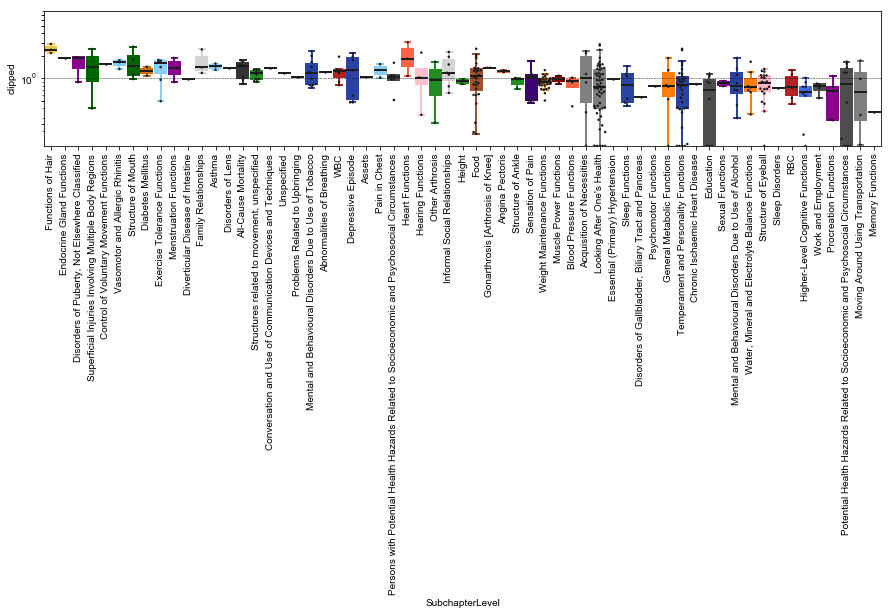

In [82]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALL1KG_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALL1KG_NMATCH_sprime_results.bed'].clip(.127,7.8)
colors = {'Acquisition of Necessities': 'gray',
'Conversation and Use of Communication Devices and Techniques': 'gray',
'Looking After One\'s Health': 'gray',
'Moving Around Using Transportation': 'gray',
'Unspecified': 'gray',
'Structure of Mouth': 'darkgreen',
'Superficial Injuries Involving Multiple Body Regions': 'darkgreen',
'Angina Pectoris': 'tomato',
'Blood Pressure Functions': 'tomato',
'Chronic Ischaemic Heart Disease': 'tomato',
'Essential (Primary) Hypertension': 'tomato',
'Heart Functions': 'tomato',
'Higher-Level Cognitive Functions': 'royalblue',
'Memory Functions': 'royalblue',
'Psychomotor Functions': 'royalblue',
'Functions of Hair': '#ebc849',
'Hearing Functions': 'pink',
'Diabetes Mellitus': '#d16d08',
'Endocrine Gland Functions': '#d16d08',
'Assets': '.3',
'Education': '.3',
'Persons with Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Problems Related to Upbringing': '.3',
'Work and Employment': '.3',
'Disorders of Gallbladder, Biliary Tract and Pancreas': 'saddlebrown',
'Diverticular Disease of Intestine': 'saddlebrown',
'WBC': 'firebrick',
'RBC': 'firebrick',
'General Metabolic Functions': 'C1',
'Water, Mineral and Electrolyte Balance Functions': 'C1',
'Weight Maintenance Functions': 'C1',
'All-Cause Mortality': '.2',
'Control of Voluntary Movement Functions': 'darkred',
'Muscle Power Functions': 'darkred',
'Sensation of Pain': '#3d0373',
'Sleep Disorders': '#3d0373',
'Food': 'sienna',
'Disorders of Lens': 'lightpink',
'Structure of Eyeball': 'lightpink',
'Depressive Episode': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Alcohol': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Tobacco': '#2a42a1',
'Sleep Functions': '#2a42a1',
'Temperament and Personality Functions': '#2a42a1',
'Disorders of Puberty, Not Elsewhere Classified': '#88048c',
'Menstruation Functions': '#88048c',
'Procreation Functions': '#88048c',
'Sexual Functions': '#88048c',
'Abnormalities of Breathing': 'lightskyblue',
'Asthma': 'lightskyblue',
'Exercise Tolerance Functions': 'lightskyblue',
'Pain in Chest': 'lightskyblue',
'Vasomotor and Allergic Rhinitis': 'lightskyblue',
'Gonarthrosis [Arthrosis of Knee]': 'forestgreen',
'Height': 'forestgreen',
'Other Arthrosis': 'forestgreen',
'Structures related to movement, unspecified': 'forestgreen',
'Family Relationships': 'lightgray',
'Informal Social Relationships': 'lightgray',
'Structure of Ankle': 'forestgreen'}


fig, ax = plt.subplots(figsize=(15, 2.5))
g = sns.boxplot(x='SubchapterLevel', y='ALL1KG_NMATCH_sprime_results.bed', data=domain, order = subchapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain, color="k", size=2.5,order=subchapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Subchapter_B.pdf")


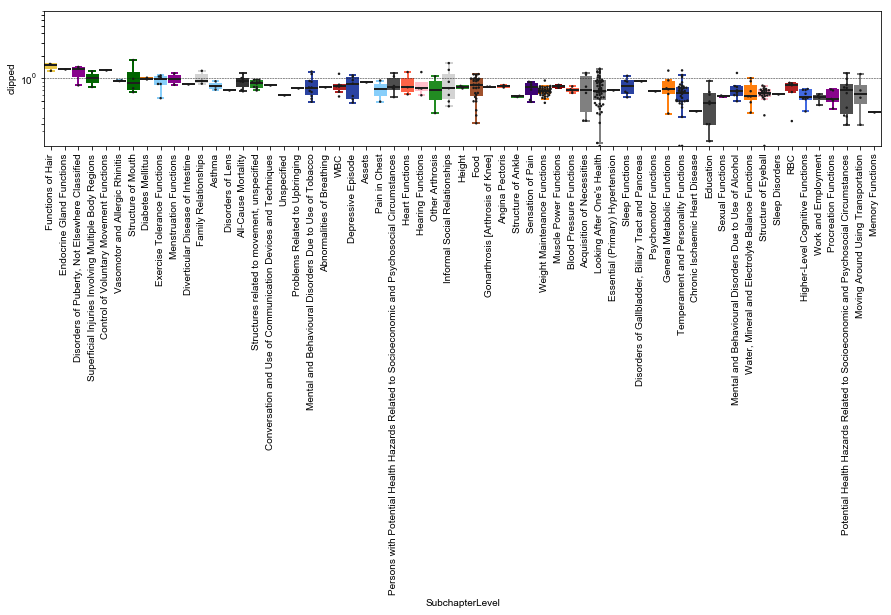

In [83]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_sprime_results.bed'].clip(.127,7.8)
colors = {'Acquisition of Necessities': 'gray',
'Conversation and Use of Communication Devices and Techniques': 'gray',
'Looking After One\'s Health': 'gray',
'Moving Around Using Transportation': 'gray',
'Unspecified': 'gray',
'Structure of Mouth': 'darkgreen',
'Superficial Injuries Involving Multiple Body Regions': 'darkgreen',
'Angina Pectoris': 'tomato',
'Blood Pressure Functions': 'tomato',
'Chronic Ischaemic Heart Disease': 'tomato',
'Essential (Primary) Hypertension': 'tomato',
'Heart Functions': 'tomato',
'Higher-Level Cognitive Functions': 'royalblue',
'Memory Functions': 'royalblue',
'Psychomotor Functions': 'royalblue',
'Functions of Hair': '#ebc849',
'Hearing Functions': 'pink',
'Diabetes Mellitus': '#d16d08',
'Endocrine Gland Functions': '#d16d08',
'Assets': '.3',
'Education': '.3',
'Persons with Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Problems Related to Upbringing': '.3',
'Work and Employment': '.3',
'Disorders of Gallbladder, Biliary Tract and Pancreas': 'saddlebrown',
'Diverticular Disease of Intestine': 'saddlebrown',
'WBC': 'firebrick',
'RBC': 'firebrick',
'General Metabolic Functions': 'C1',
'Water, Mineral and Electrolyte Balance Functions': 'C1',
'Weight Maintenance Functions': 'C1',
'All-Cause Mortality': '.2',
'Control of Voluntary Movement Functions': 'darkred',
'Muscle Power Functions': 'darkred',
'Sensation of Pain': '#3d0373',
'Sleep Disorders': '#3d0373',
'Food': 'sienna',
'Disorders of Lens': 'lightpink',
'Structure of Eyeball': 'lightpink',
'Depressive Episode': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Alcohol': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Tobacco': '#2a42a1',
'Sleep Functions': '#2a42a1',
'Temperament and Personality Functions': '#2a42a1',
'Disorders of Puberty, Not Elsewhere Classified': '#88048c',
'Menstruation Functions': '#88048c',
'Procreation Functions': '#88048c',
'Sexual Functions': '#88048c',
'Abnormalities of Breathing': 'lightskyblue',
'Asthma': 'lightskyblue',
'Exercise Tolerance Functions': 'lightskyblue',
'Pain in Chest': 'lightskyblue',
'Vasomotor and Allergic Rhinitis': 'lightskyblue',
'Gonarthrosis [Arthrosis of Knee]': 'forestgreen',
'Height': 'forestgreen',
'Other Arthrosis': 'forestgreen',
'Structures related to movement, unspecified': 'forestgreen',
'Family Relationships': 'lightgray',
'Informal Social Relationships': 'lightgray',
'Structure of Ankle': 'forestgreen'}


fig, ax = plt.subplots(figsize=(15, 2.5))
g = sns.boxplot(x='SubchapterLevel', y='ALLEUR_sprime_results.bed', data=domain, order = subchapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain, color="k", size=2.5,order=subchapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Subchapter_C.pdf")


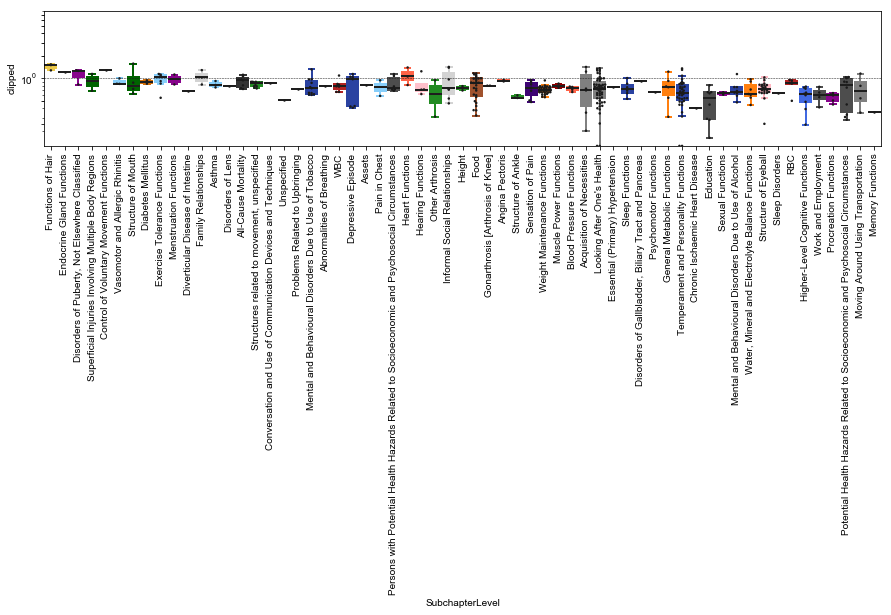

In [84]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALL1KG_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALL1KG_sprime_results.bed'].clip(.127,7.8)
colors = {'Acquisition of Necessities': 'gray',
'Conversation and Use of Communication Devices and Techniques': 'gray',
'Looking After One\'s Health': 'gray',
'Moving Around Using Transportation': 'gray',
'Unspecified': 'gray',
'Structure of Mouth': 'darkgreen',
'Superficial Injuries Involving Multiple Body Regions': 'darkgreen',
'Angina Pectoris': 'tomato',
'Blood Pressure Functions': 'tomato',
'Chronic Ischaemic Heart Disease': 'tomato',
'Essential (Primary) Hypertension': 'tomato',
'Heart Functions': 'tomato',
'Higher-Level Cognitive Functions': 'royalblue',
'Memory Functions': 'royalblue',
'Psychomotor Functions': 'royalblue',
'Functions of Hair': '#ebc849',
'Hearing Functions': 'pink',
'Diabetes Mellitus': '#d16d08',
'Endocrine Gland Functions': '#d16d08',
'Assets': '.3',
'Education': '.3',
'Persons with Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Potential Health Hazards Related to Socioeconomic and Psychosocial Circumstances': '.3',
'Problems Related to Upbringing': '.3',
'Work and Employment': '.3',
'Disorders of Gallbladder, Biliary Tract and Pancreas': 'saddlebrown',
'Diverticular Disease of Intestine': 'saddlebrown',
'WBC': 'firebrick',
'RBC': 'firebrick',
'General Metabolic Functions': 'C1',
'Water, Mineral and Electrolyte Balance Functions': 'C1',
'Weight Maintenance Functions': 'C1',
'All-Cause Mortality': '.2',
'Control of Voluntary Movement Functions': 'darkred',
'Muscle Power Functions': 'darkred',
'Sensation of Pain': '#3d0373',
'Sleep Disorders': '#3d0373',
'Food': 'sienna',
'Disorders of Lens': 'lightpink',
'Structure of Eyeball': 'lightpink',
'Depressive Episode': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Alcohol': '#2a42a1',
'Mental and Behavioural Disorders Due to Use of Tobacco': '#2a42a1',
'Sleep Functions': '#2a42a1',
'Temperament and Personality Functions': '#2a42a1',
'Disorders of Puberty, Not Elsewhere Classified': '#88048c',
'Menstruation Functions': '#88048c',
'Procreation Functions': '#88048c',
'Sexual Functions': '#88048c',
'Abnormalities of Breathing': 'lightskyblue',
'Asthma': 'lightskyblue',
'Exercise Tolerance Functions': 'lightskyblue',
'Pain in Chest': 'lightskyblue',
'Vasomotor and Allergic Rhinitis': 'lightskyblue',
'Gonarthrosis [Arthrosis of Knee]': 'forestgreen',
'Height': 'forestgreen',
'Other Arthrosis': 'forestgreen',
'Structures related to movement, unspecified': 'forestgreen',
'Family Relationships': 'lightgray',
'Informal Social Relationships': 'lightgray',
'Structure of Ankle': 'forestgreen'}


fig, ax = plt.subplots(figsize=(15, 2.5))
g = sns.boxplot(x='SubchapterLevel', y='ALL1KG_sprime_results.bed', data=domain, order = subchapter_order, ax=ax, palette=colors, linewidth=2,showfliers=False, saturation=1)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
g = sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain, color="k", size=2.5,order=subchapter_order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=.5)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.125, 8)
_ = ax.set(yticks=[.25,.5,1,2,3,4,5,6,7])
plt.savefig("/home/mcarthe/Subchapter_D.pdf")


### Figs 2B-2E

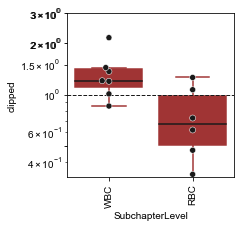

In [85]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.34,2.9)


fig, ax = plt.subplots(figsize=(3, 3))
order = list(domain[domain['Domain'] == 'Immunological'].groupby('SubchapterLevel')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='SubchapterLevel', y='ALLEUR_NMATCH_sprime_results.bed', data=domain[domain['Domain'] == 'Immunological'], order = order, ax=ax, color='firebrick', linewidth=1.5,showfliers=False)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
        else:
            line = ax.lines[j]
            line.set_color('k')
g= sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain[domain['Domain'] == 'Immunological'], color="k",linewidth=.5,edgecolor='white', size=6,order=order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=1)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.33, 3)
_ = ax.set(yticks=[.5,1,1.5,2,3])
#plt.savefig("/home/mcarthe/fig2immuno.pdf")

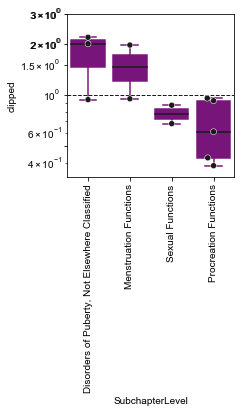

In [86]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.34,2.9)


fig, ax = plt.subplots(figsize=(3, 3))
order = list(domain[domain['Domain'] == 'Reproduction'].groupby('SubchapterLevel')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='SubchapterLevel', y='ALLEUR_NMATCH_sprime_results.bed', data=domain[domain['Domain'] == 'Reproduction'], order = order, ax=ax, color='#88048c', linewidth=1.5,showfliers=False)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
        else:
            line = ax.lines[j]
            line.set_color('k')
g= sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain[domain['Domain'] == 'Reproduction'], color="k",linewidth=.5,edgecolor='white', size=6,order=order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=1)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.33, 3)
_ = ax.set(yticks=[.5,1,1.5,2,3])
#plt.savefig("/home/mcarthe/fig2repro.pdf")

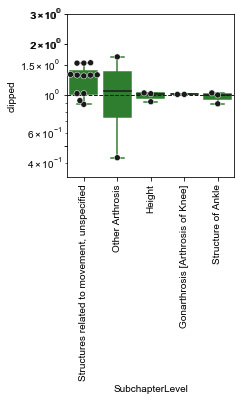

In [87]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.34,2.9)

fig, ax = plt.subplots(figsize=(3, 3))
order = list(domain[domain['Domain'] == 'Skeletal'].groupby('SubchapterLevel')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='SubchapterLevel', y='ALLEUR_NMATCH_sprime_results.bed', data=domain[domain['Domain'] == 'Skeletal'], order = order, ax=ax, color='forestgreen', linewidth=1.5,showfliers=False)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
        else:
            line = ax.lines[j]
            line.set_color('k')
g= sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain, color="k",linewidth=.5,edgecolor='white', size=6,order=order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=1)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.33, 3)
_ = ax.set(yticks=[.5,1,1.5,2,3])
#plt.savefig("/home/mcarthe/fig2skeletal.pdf")

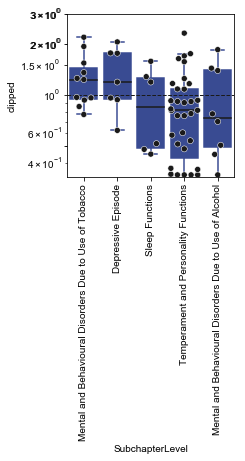

In [88]:
enr = partitioned_h2("UKBB_introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = enr.reset_index()
enr = enr.rename(columns={'0':'EvonneFileName'})
domain = enr.merge(sumstats_domain, on='EvonneFileName')
domain['clipped'] = domain['ALLEUR_NMATCH_sprime_results.bed'].clip(.34,2.9)

fig, ax = plt.subplots(figsize=(3, 3))
order = list(domain[domain['Domain'] == 'Psychiatric'].groupby('SubchapterLevel')['ALLEUR_NMATCH_sprime_results.bed'].median().sort_values(ascending=False).index)
g = sns.boxplot(x='SubchapterLevel', y='ALLEUR_NMATCH_sprime_results.bed', data=domain[domain['Domain'] == 'Psychiatric'], order = order, ax=ax, color='#2a42a1', linewidth=1.5,showfliers=False)
_ = g.set_xticklabels(g.get_xticklabels(),rotation=90)
for i,artist in enumerate(ax.artists):
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    for j in range(i*5,i*5+5):
        if j%5 != 4:
            line = ax.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
        else:
            line = ax.lines[j]
            line.set_color('k')
g= sns.swarmplot(x='SubchapterLevel', y='clipped', data=domain, color="k",linewidth=.5,edgecolor='white', size=6,order=order, ax=ax)
_ = g.axhline(y=1, color='k', linestyle="--", linewidth=1)
_ = g.axhline(y=0, color='k')
_ = ax.set(yscale="log")
_ = ax.set_ylim(.33, 3)
_ = ax.set(yticks=[.5,1,1.5,2,3])
#plt.savefig("/home/mcarthe/fig2psych.pdf")

## Fig 3. Direction of effect analysis

### LD expand neanderthal variants and find archaic allele

In [9]:
nean_variants = pd.read_csv("/dors/capra_lab/users/evonne/nean_h2/data/ALLEUR_NMATCH_sprime_results.bed",sep="\t",header=None)
nean_variants.columns = ['chr','start','end','SNP_B','Ref','Alt','AltAlleleArchaic','NMATCH','DMATCH']
nean_variants.head()

,chr,start,end,SNP_B,Ref,Alt,AltAlleleArchaic,NMATCH,DMATCH
0,chr1,1461306,1461307,rs116279124,C,T,1,match,match
1,chr1,1525403,1525404,rs78746457,G,T,1,match,mismatch
2,chr1,1534709,1534710,rs79079518,G,C,1,match,notcomp
3,chr1,1549749,1549750,rs74735770,C,A,1,match,mismatch
4,chr1,1552096,1552097,rs28502067,G,A,1,match,mismatch


In [12]:
len(nean_variants)
len(trait_sumstats['AutoimmuneDz'])
nean_variants.merge(trait_sumstats['AutoimmuneDz'], on='SNP_B').head()[['chr','start','end']].to_csv("test.bed", header=False, index=False, sep="\t")

138774

1187056

In [4]:
#for i in {1..22}; do grep "chr""$i" ../ALLEUR_NMATCH_sprime_results.bed > tmp; wc -l tmp; plink --ld-snp-list tmp --noweb --ld-window-r2 0.2 --bfile /dors/capra_lab/users/evonne/SLDP/data/plink_files_FULL/1000G.EUR.QC."$i" --ld-window 1000000 --r2 in-phase --out "chr""$i"; done
#for i in {1..22}; do tail -n+2 chr"$i".ld >> all.ld; done
#cat all.ld | awk '{print $6}' > allrsid.ld; sort -u allrsid.ld | wc -l
#567985
#wc -l all.ld #28,040,769
ld_expanded_nean_variants = pd.read_csv("/dors/capra_lab/users/evonne/nean_h2/data/ALLEUR_NMATCH_LDexpanded/all.ld", sep=r"\s*",engine='python')
ld_expanded_nean_variants.head()

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/pandas/io/parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/pandas/io/parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,PHASE,R2
0,1,1461307,rs116279124,1,1160245,rs57994571,TT/CA,0.201866
1,1,1461307,rs116279124,1,1160267,rs76371582,TG/CT,0.201866
2,1,1461307,rs116279124,1,1169094,rs45574035,TC/CG,0.201866
3,1,1461307,rs116279124,1,1170148,rs61353980,TT/CC,0.201866
4,1,1461307,rs116279124,1,1170682,rs114640435,TA/CG,0.201866


In [6]:
PERFld_expanded_nean_variants = ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > .999]
PERFld_expanded_nean_variants = PERFld_expanded_nean_variants.groupby('SNP_B').first().reset_index()
len(PERFld_expanded_nean_variants)
PERFld_expanded_nean_variants.head()

268484

,SNP_B,CHR_A,BP_A,SNP_A,CHR_B,BP_B,PHASE,R2
0,rs10000804,4,4864230,rs10014077,4,4864299,GA/AG,1.0
1,rs10001029,4,5790160,rs10001029,4,5790160,CC/AA,1.0
2,rs10001077,4,165642458,rs75863130,4,165638228,GC/TT,1.0
3,rs10001115,4,119740028,rs114659035,4,119781867,TC/CA,1.0
4,rs1000114,21,43880975,rs1000114,21,43880975,TT/GG,1.0


In [7]:
def findArchaicAllele(phase, rsID):
    nean = nean_variants[nean_variants['SNP'] == rsID]
    ref = list(nean.loc[:,'Ref'])[0]
    alt = list(nean.loc[:,'Alt'])[0]
    AltAlleleArchaic = list(nean.loc[:,'AltAlleleArchaic'])[0]

    if AltAlleleArchaic == 1:
        archaic_allele = alt
    elif AltAlleleArchaic == 0:
        archaic_allele = ref
        
    phase = list(phase)
    if phase[0] == archaic_allele:
        return(phase[1])
    elif phase[3] == archaic_allele:
        return(phase[4])
    else:
        return('Unknown')

In [8]:
def otherAllele(phase, archaic_allele):
    if phase[1] == archaic_allele:
        return(phase[4])
    elif phase[4] == archaic_allele:
        return(phase[1])
    else:
        return('Unknown')

In [9]:
PERFld_expanded_nean_variants['archaic_allele'] = PERFld_expanded_nean_variants.apply(lambda x: findArchaicAllele(x['PHASE'], x['SNP_A']),axis=1)
PERFld_expanded_nean_variants['other_allele'] = PERFld_expanded_nean_variants.apply(lambda x: otherAllele(x['PHASE'],x['archaic_allele']),axis=1)

In [10]:
PERFld_expanded_nean_variants.head()

,SNP_B,CHR_A,BP_A,SNP_A,CHR_B,BP_B,PHASE,R2,archaic_allele,other_allele
0,rs10000804,4,4864230,rs10014077,4,4864299,GA/AG,1.0,A,G
1,rs10001029,4,5790160,rs10001029,4,5790160,CC/AA,1.0,C,A
2,rs10001077,4,165642458,rs75863130,4,165638228,GC/TT,1.0,C,T
3,rs10001115,4,119740028,rs114659035,4,119781867,TC/CA,1.0,C,A
4,rs1000114,21,43880975,rs1000114,21,43880975,TT/GG,1.0,T,G


### Intersect with GWAS

In [11]:
def ZscoreForArchaic(Z,GWAS_A1, GWAS_A2, archaic_allele, other_allele):
    if (archaic_allele == GWAS_A1) and (other_allele == GWAS_A2):
        return(Z)
    elif (archaic_allele == GWAS_A2) and (other_allele == GWAS_A1):
        return(-1*Z)
    else:
        return(np.nan)

In [6]:
trait_sumstats = {}
gwas_intersection = {}

traits = ['AutoimmuneDz','Balding','MenopauseAge','Sunburn','FVC','Heel_T_Score','MorningPerson','WBCCount']
for trait in traits:
    trait_sumstats[trait] = pd.read_csv('/dors/capra_lab/users/evonne/LDSC/data/GWAS/' + trait + '/' + trait + '.sumstats.gz', sep="\t")
    trait_sumstats[trait].columns = ['SNP_B', 'GWAS_A1','GWAS_A2','N','CHISQ','Z']
    gwas_intersection[trait] = PERFld_expanded_nean_variants.merge(trait_sumstats[trait], on='SNP_B')
    gwas_intersection[trait]['archaicZscore'] = gwas_intersection[trait].apply(lambda x: ZscoreForArchaic(x['Z'],x['GWAS_A1'],x['GWAS_A2'],x['archaic_allele'],x['other_allele']),axis=1)

In [13]:
# Calculating how many of the neanderthal SNPs (138K) are tagged in perfect LD (r2=1) by the GWAS. All these GWASs are from UKBiobank so they have the same tag snps
len(ld_expanded_nean_variants[(ld_expanded_nean_variants['SNP_B'].isin(list(gwas_intersection['AutoimmuneDz']['SNP_B']))) & (ld_expanded_nean_variants['R2'] > 0.999)]['SNP_A'].unique())
len(nean_variants)
40840/138774

40840

138774

0.2942914378774122

In [3]:
dbSNP = pd.read_csv("/dors/capra_lab/users/evonne/nean_h2/data/GWASintersection/snp151.bed.gz",sep="\t",header=None)
dbSNP.columns = ['chr','start','end','SNP_B','dbSNP_ref','dbSNP_alt']
merge = trait_sumstats['AutoimmuneDz'].merge(dbSNP, on=['SNP_B'])
merge = merge.rename(columns = {'SNP_B':'rsID'})
merge[['chr','start','end','rsID','GWAS_A1','GWAS_A2','dbSNP_ref','dbSNP_alt']].to_csv("gwasLoci_bydbSNP151intersection.bed",index=False,sep="\t")

,0,1,2,3,4,5
0,chr1,10019,10020,rs775809821,A,-/A
1,chr1,10038,10039,rs978760828,A,A/C
2,chr1,10042,10043,rs1008829651,T,A/T
3,chr1,10050,10051,rs1052373574,A,A/G
4,chr1,10051,10051,rs1326880612,-,-/C


In [303]:
def ld_clump_sig_hits(ld_clump_r2, z_score_threshold):
    zscores = {}
    snps = {}
    for trait in traits:
        sig_snps = gwas_intersection[trait][abs(gwas_intersection[trait]['archaicZscore']) > z_score_threshold]#5.326723 #5.612001244174789
        snps[trait] = pd.DataFrame()
        for chr in sig_snps['CHR_B'].unique():
            if len(sig_snps[sig_snps['CHR_B'] == chr]) > 1:
                url_prefix = 'https://ldlink.nci.nih.gov/LDlinkRest/ldmatrix?snps='
                url_suffix = '&pop=CEU&r2_d=r2&token=1fff81cd2d23'
                url_middle =     '%0A'.join(list(sig_snps[sig_snps['CHR_B'] == chr].loc[:,'SNP_B']))
                snps_chr = sig_snps[sig_snps['CHR_B'] == chr][['CHR_B','BP_B','SNP_B','archaic_allele','other_allele','archaicZscore']].copy()
                url = url_prefix + url_middle + url_suffix

                r = requests.get(url).text
                r = pd.read_csv(StringIO(r), sep="\t")
                r.index = r['RS_number']
                r.drop(['RS_number'],axis=1, inplace=True)

                r[r > ld_clump_r2] = 1
                r[r <= ld_clump_r2] = 0

                linkage = ward(pdist(r))
                clusters = fcluster(linkage, t=0, criterion='distance')
                try:
                    snps_chr['cluster'] = clusters + max(snps[trait]['cluster'])
                except:
                    snps_chr['cluster'] = clusters
                snps[trait] = snps[trait].append(snps_chr)
            else:
                try:
                    snps_chr['cluster'] = max(snps[trait]['cluster']) + 1
                except:
                    snps_chr['cluster'] = 1
        try:
            zscores[trait] = snps[trait].groupby('cluster')['archaicZscore'].apply(lambda x: max(x) if abs(max(x)) > abs(min(x)) else min(x))
        except:
            pass
    return(zscores)   
    

In [296]:
def plotDirectionOfEffect(zscores,ld_clump_str,pval_str):
    gwas_direction = []
    for trait in traits:
        try:
            neg = sum(zscores[trait] < 0)
            pos = sum(zscores[trait] > 0)
            chi2_stat = 2*((neg-((neg+pos)/2))**2)/((neg+pos)/2)
            p = 1-chi2.cdf(chi2_stat,1)
            gwas_direction.append({'trait': trait, 'negative_direction': neg, 'positive_direction':pos, 'chi2_stat':chi2_stat,'pval': p})
        except:
            gwas_direction.append({'trait': trait, 'negative_direction': 0, 'positive_direction':0, 'chi2_stat':np.nan,'pval': np.nan})
    gwas_direction = pd.DataFrame(gwas_direction)[['trait','negative_direction','positive_direction','chi2_stat','pval']]
    gwas_direction.index = gwas_direction['trait']; gwas_direction.drop('trait',axis=1,inplace=True)
    
    ax = gwas_direction[['negative_direction','positive_direction']].plot.bar()
    rects = ax.patches

    labels = np.round(list(gwas_direction['pval']),3)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        _ = ax.text(rect.get_x() + rect.get_width(), height + 20, label,
                ha='center', va='bottom')
    labels = list(gwas_direction['negative_direction']) + list(gwas_direction['positive_direction'])
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        _ = ax.text(rect.get_x() + rect.get_width()/2, height + 2, label,
                ha='center', va='bottom')
        
    ax.set_ylim(0,ax.get_ylim()[1] + 10)
    plt.title("P val = " + pval_str + ", LD prune R2 = " + ld_clump_str)
    plt.savefig("/home/mcarthe/genomeWideSigSnpsThresholds_" + pval_str + "_" + ld_clump_str + "_R2" + ".pdf")
    return(gwas_direction)


In [301]:
# z value thresholds corresponding to p-values
stats.norm.ppf(1*(10**(-6)))
stats.norm.ppf(5*(10**(-8)))
stats.norm.ppf(1*(10**(-8)))

-4.753424308822899

-5.326723886384496

-5.612001244174789

### Fig 3A & Supplemental

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,15,2,9.941176,0.001616
MenopauseAge,10,2,5.333333,0.020921
Sunburn,1,4,1.800000,0.179712
FVC,10,25,6.428571,0.011230
Heel_T_Score,45,61,2.415094,0.120171
MorningPerson,3,13,6.250000,0.012419
WBCCount,22,14,1.777778,0.182422


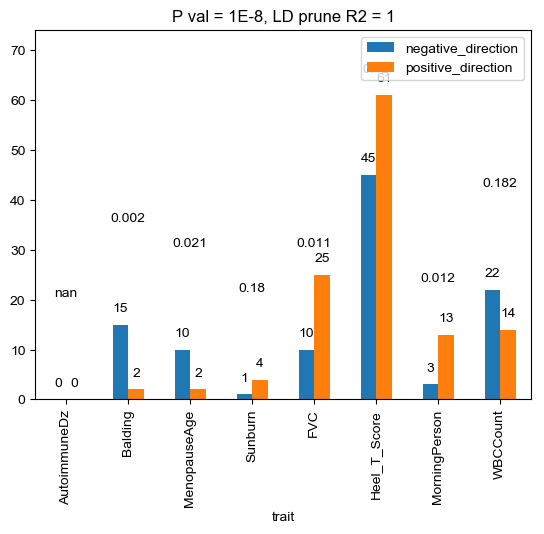

In [304]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.999, z_score_threshold = 5.612)
plotDirectionOfEffect(zscores,"1","1E-8")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,9,2,4.454545,0.034808
MenopauseAge,5,2,1.285714,0.256839
Sunburn,1,4,1.800000,0.179712
FVC,5,15,5.000000,0.025347
Heel_T_Score,30,44,2.648649,0.103638
MorningPerson,2,11,6.230769,0.012555
WBCCount,17,14,0.290323,0.590014


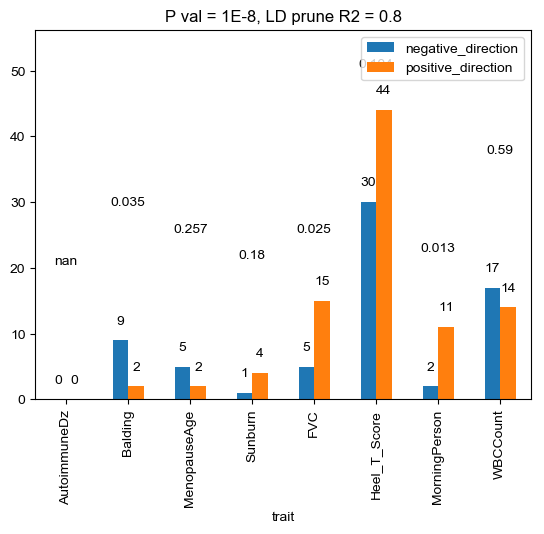

In [305]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.8, z_score_threshold = 5.612)
plotDirectionOfEffect(zscores,"0.8","1E-8")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,7,2,2.777778,0.095581
MenopauseAge,3,1,1.000000,0.317311
Sunburn,1,3,1.000000,0.317311
FVC,6,11,1.470588,0.225253
Heel_T_Score,25,37,2.322581,0.127508
MorningPerson,3,10,3.769231,0.052204
WBCCount,14,13,0.037037,0.847390


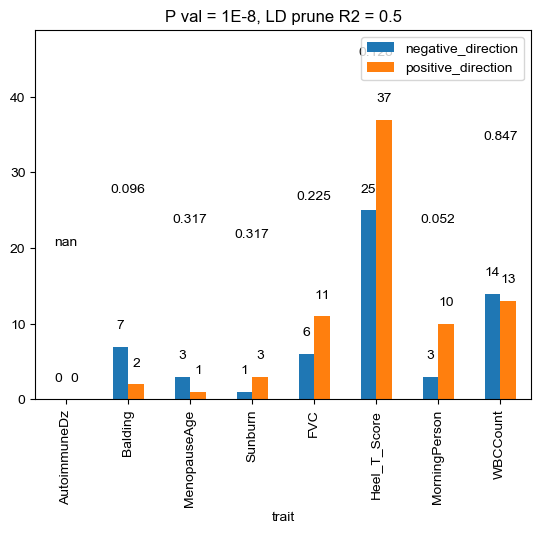

In [311]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.5, z_score_threshold = 5.612)
plotDirectionOfEffect(zscores,"0.5","1E-8")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,15,3,8.000000,0.004678
MenopauseAge,11,2,6.230769,0.012555
Sunburn,3,4,0.142857,0.705457
FVC,14,26,3.600000,0.057780
Heel_T_Score,56,66,0.819672,0.365276
MorningPerson,4,14,5.555556,0.018422
WBCCount,30,17,3.595745,0.057928


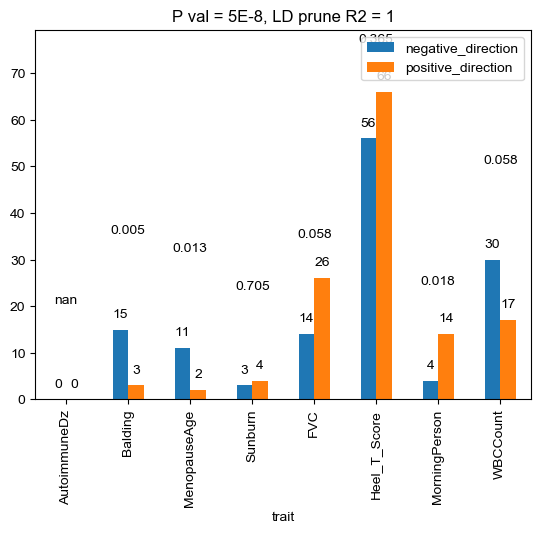

In [306]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.999, z_score_threshold = 5.326723)
plotDirectionOfEffect(zscores,"1","5E-8")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,9,3,3.000000,0.083265
MenopauseAge,5,2,1.285714,0.256839
Sunburn,3,4,0.142857,0.705457
FVC,8,16,2.666667,0.102470
Heel_T_Score,39,45,0.428571,0.512691
MorningPerson,3,12,5.400000,0.020137
WBCCount,22,17,0.641026,0.423340


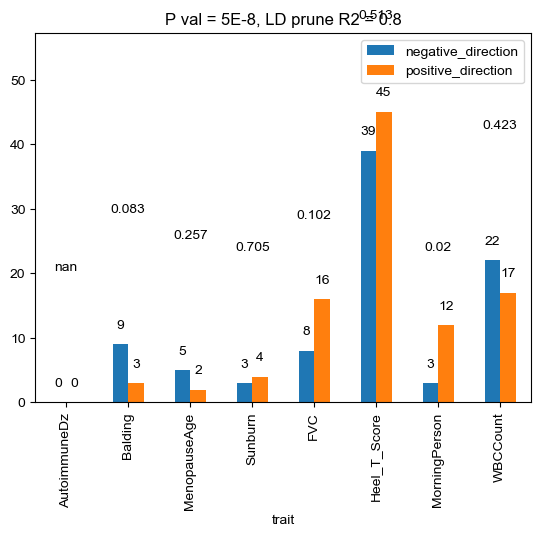

In [307]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.8, z_score_threshold = 5.326723)
plotDirectionOfEffect(zscores,"0.8","5E-8")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,7,3,1.600000,0.205903
MenopauseAge,3,1,1.000000,0.317311
Sunburn,2,3,0.200000,0.654721
FVC,8,12,0.800000,0.371093
Heel_T_Score,31,43,1.945946,0.163024
MorningPerson,4,11,3.266667,0.070701
WBCCount,18,15,0.272727,0.601508


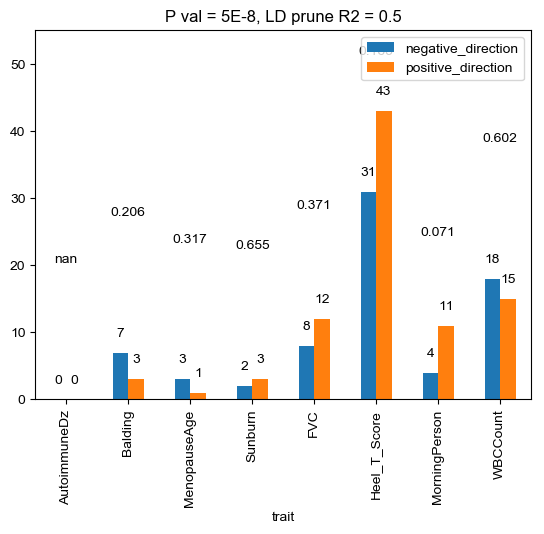

In [312]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.5, z_score_threshold = 5.326723)
plotDirectionOfEffect(zscores,"0.5","5E-8")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,16,7,3.521739,0.060569
MenopauseAge,11,5,2.250000,0.133614
Sunburn,7,4,0.818182,0.365712
FVC,31,38,0.710145,0.399396
Heel_T_Score,72,76,0.108108,0.742308
MorningPerson,12,16,0.571429,0.449692
WBCCount,39,25,3.062500,0.080118


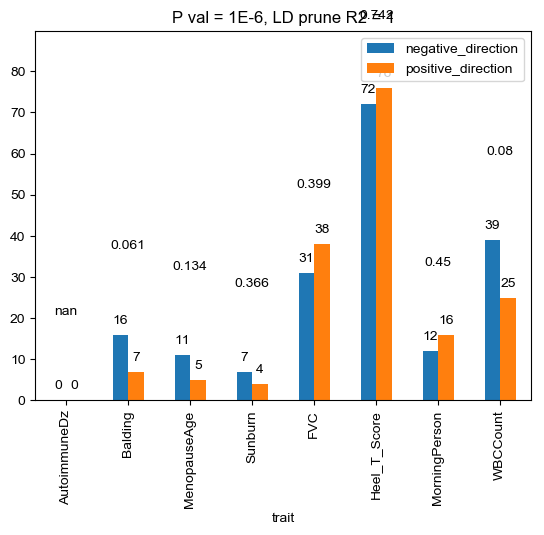

In [309]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.999, z_score_threshold = 4.7534243)
plotDirectionOfEffect(zscores,"1","1E-6")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,10,7,0.529412,0.466854
MenopauseAge,5,5,0.000000,1.000000
Sunburn,5,4,0.111111,0.738883
FVC,20,27,1.042553,0.307228
Heel_T_Score,49,55,0.346154,0.556298
MorningPerson,10,14,0.666667,0.414216
WBCCount,26,23,0.183673,0.668235


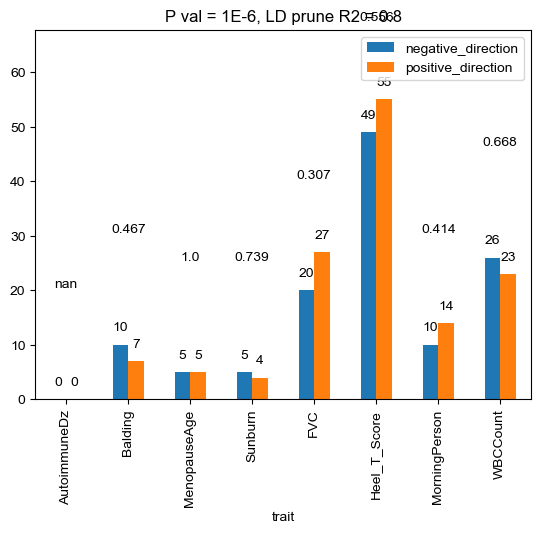

In [310]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.8, z_score_threshold = 4.7534243)
plotDirectionOfEffect(zscores,"0.8","1E-6")

,negative_direction,positive_direction,chi2_stat,pval
trait,,,,
AutoimmuneDz,0,0,NaN,NaN
Balding,8,6,0.285714,0.592980
MenopauseAge,3,4,0.142857,0.705457
Sunburn,5,3,0.500000,0.479500
FVC,16,18,0.117647,0.731601
Heel_T_Score,43,46,0.101124,0.750485
MorningPerson,9,14,1.086957,0.297147
WBCCount,22,21,0.023256,0.878794


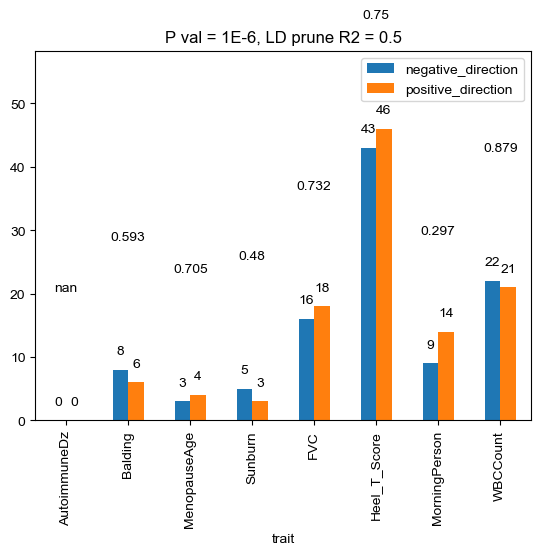

In [313]:
zscores = ld_clump_sig_hits(ld_clump_r2 = 0.5, z_score_threshold = 4.7534243)
plotDirectionOfEffect(zscores,"0.5","1E-6")

### Fig 3B

In [ ]:
# for all traits, takes a few hours
#! re-run
traits8 = ['AutoimmuneDz','Balding','MenopauseAge','Sunburn','FVC','Heel_T_Score','MorningPerson','WBCCount']

for trait in traits8:
    trait
    snps = pd.read_csv("/dors/capra_lab/users/evonne/SLDP/results/ALLEUR_NMATCH_LDexpanded_r2_2_LDSCtraits_withSNPfiles/output/"+ trait + "snpsfile.tsv", sep="\t")
    snps['ahat_resid'] = snps.apply(lambda x: -1*x['ahat_resid'] if (x['Rv_resid'] < 0) else x['ahat_resid'],axis=1)
    snps['Rv_resid'] = np.abs(snps['Rv_resid'])
    bins = np.linspace(snps['Rv_resid'].quantile(.0015),snps['Rv_resid'].quantile(.995),10)
    g = sns.lmplot(x='Rv_resid', y='ahat_resid',data=snps,x_estimator=np.mean,x_bins=bins)
    g.set(xlim=(-10,210))
    g.set(ylim=(-.0006,.0006))
    plt.savefig("/home/mcarthe/" + trait + "_ahat_rv_corr_neanFlip.pdf")


'AutoimmuneDz'

'Balding'

'MenopauseAge'

'Sunburn'

## Interesting Examples 

### Finding windows of interest

In [744]:
traits8 = ['AutoimmuneDz','Balding','MenopauseAge','Sunburn','FVC','Heel_T_Score','MorningPerson','WBCCount']

windows_of_interest = {}

for trait in traits8:
    trait
    snps = pd.read_csv("/dors/capra_lab/users/evonne/SLDP/results/ALLEUR_NMATCH_LDexpanded_r2_2_LDSCtraits_withSNPfiles/output/"+ trait + "snpsfile.tsv", sep="\t")
    snps['ahat_resid'] = snps.apply(lambda x: -1*x['ahat_resid'] if (x['Rv_resid'] < 0) else x['ahat_resid'],axis=1)
    snps['Rv_resid'] = np.abs(snps['Rv_resid'])
    for chr in range(1,23):
        print(chr)
        snps_byChr = snps[snps['CHR'] == chr].sort_values(by='BP')
        snps_byChr = snps_byChr.reset_index(drop=True)
        window_index = []
        for index,row in snps_byChr.iterrows():
            snps_in_window = snps_byChr[(snps_byChr['BP'] >= row['BP'] - 15000) & (snps_byChr['BP'] <= row['BP']+15000)]#.plot.scatter(x='Rv_resid',y='ahat_resid', figsize=(7,7))
            if (len(snps_in_window) >= 15) and (snps_in_window.loc[:,['ahat_resid','Rv_resid']].corr().loc['ahat_resid','Rv_resid']**2 > 0.5):
                window_index.append({'START':row['BP'] - 15000,'FINISH':row['BP']+15000})
                
        window_index = pd.DataFrame(window_index)
        
        if len(window_index) > 0:
            window_index["group"]=(window_index["START"]>window_index["FINISH"].shift()).cumsum() # collapse overlapping windows
            window_index=window_index.groupby("group").agg({"START":"min", "FINISH": "max"}) # collapse overlapping windows
            for idx,row in window_index.iterrows():
                try:
                    snps_in_window = snps_byChr[(snps_byChr['BP'] >= row['START']) & (snps_byChr['BP'] <= row['FINISH'])]#.plot.scatter(x='Rv_resid',y='ahat_resid', figsize=(7,7))
                    windows_of_interest[trait].append({'chr':chr, 
                                           'start': row['START'] - 1, 
                                           'end': row['FINISH'],
                                           'max_chi2': max(snps_in_window['chi2']),
                                           'r': snps_in_window.loc[:,['ahat_resid','Rv_resid']].corr().loc['ahat_resid','Rv_resid'],
                                           'num_snps': len(snps_in_window)})
                except:
                    windows_of_interest[trait] = []
                    snps_in_window = snps_byChr[(snps_byChr['BP'] >= row['START']) & (snps_byChr['BP'] <= row['FINISH'])]#.plot.scatter(x='Rv_resid',y='ahat_resid', figsize=(7,7))
                    windows_of_interest[trait].append({'chr':chr, 
                                           'start': row['START'] - 1, 
                                           'end': row['FINISH'],
                                           'max_chi2': max(snps_in_window['chi2']),
                                           'r': snps_in_window.loc[:,['ahat_resid','Rv_resid']].corr().loc['ahat_resid','Rv_resid'],
                                           'num_snps': len(snps_in_window)})

    windows_of_interest[trait] = pd.DataFrame(windows_of_interest[trait])[['chr','start','end','max_chi2','r','num_snps']].sort_values(by='max_chi2',ascending=False)

for trait in traits8:
    windows_of_interest[trait]['start'] = windows_of_interest[trait]['start'] - 1
    windows_of_interest[trait][windows_of_interest[trait]['max_chi2'] >= 15.14].to_csv('SLDPinterestingWindows_1E4_0.5r2_neanFlip_' + trait + '.tsv', sep="\t", index=False, header=True)


'AutoimmuneDz'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
18
19
20
21
22


'Balding'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'MenopauseAge'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'Sunburn'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'FVC'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'Heel_T_Score'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'MorningPerson'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'WBCCount'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'AutoimmuneDz'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'Balding'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'MenopauseAge'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'Sunburn'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'FVC'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'Heel_T_Score'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'MorningPerson'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


'WBCCount'

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22


In [425]:
def plotWindowOfInterest(trait, chr, start, end, figsize_tuple=(6,6), snp_list=[], saveFig=False):
    snps = pd.read_csv("/dors/capra_lab/users/evonne/SLDP/results/ALLEUR_NMATCH_LDexpanded_r2_2_LDSCtraits_withSNPfiles/output/"+ trait + "snpsfile.tsv", sep="\t")
    window = snps[(snps['CHR'] == chr) & (snps['BP'] >= start) & (snps['BP'] <= end)]
    window['ahat_resid'] = window.apply(lambda x: -1*x['ahat_resid'] if (x['Rv_resid'] < 0) else x['ahat_resid'],axis=1)
    window['Rv_resid'] = np.abs(window['Rv_resid'])
    print(window[['Rv_resid','ahat_resid']].corr().loc['Rv_resid','ahat_resid'])
    m, b = np.polyfit(window['Rv_resid'], window['ahat_resid'], 1)

    jitter = window.copy()
    jitter['ahat_resid'] = jitter['ahat_resid'] + 0.001* np.random.rand(len(jitter['ahat_resid'])) - 0.0005
    jitter['Rv_resid'] = jitter['Rv_resid'] + 6* np.random.rand(len(jitter['Rv_resid'])) - 3

    ax = jitter.plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.3, color='.45',figsize=figsize_tuple)
    ax.set_ylim((-0.007,0.003))
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.2]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.6',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.3]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.53',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.4]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.47',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.5]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.40',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.6]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.34',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.7]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.27',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.8]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.21',ax=ax)
    _=jitter[jitter['SNP'].isin(ld_expanded_nean_variants[ld_expanded_nean_variants['R2'] > 0.9]['SNP_B'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='0.15',ax=ax)
    _=jitter[jitter['SNP'].isin(nean_variants['SNP'])].plot.scatter(x='Rv_resid',y='ahat_resid', alpha = 0.8, color='k',ax=ax)
    for i in snp_list:
        try:
            _=jitter[jitter['SNP']==i].plot(x='Rv_resid',y='ahat_resid', alpha = 1, color='k',ax=ax,fillstyle='none',markersize=16,marker="*", markeredgewidth=1.5)
        except:
            pass
    _=plt.plot([min(window['Rv_resid']),max(window['Rv_resid'])], m*np.array([min(window['Rv_resid']),max(window['Rv_resid'])]) + b, color='k', linestyle="--")
    if saveFig:
        plt.savefig("/home/mcarthe/" + str(chr) + "_" + str(start) + "-" + str(end) + ".pdf")        
    plt.show()
    return(window)

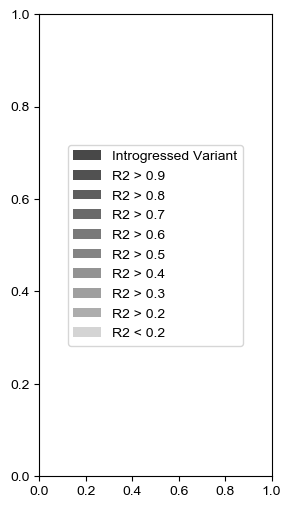

In [407]:
#Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='k',alpha = 0.8,label='Introgressed Variant'),
Patch(facecolor='0.15',alpha = 0.8, label='R2 > 0.9'),
Patch(facecolor='0.21',alpha = 0.8, label='R2 > 0.8'),
Patch(facecolor='0.27',alpha=0.8,label='R2 > 0.7'),
Patch(facecolor='0.34',alpha = 0.8, label='R2 > 0.6'),
Patch(facecolor='0.40',alpha=0.8, label='R2 > 0.5'),
Patch(facecolor='0.47',alpha=0.8, label='R2 > 0.4'),
Patch(facecolor='0.53',alpha=0.8, label='R2 > 0.3'),
Patch(facecolor='0.6',alpha=0.8,label='R2 > 0.2'),
Patch(facecolor='0.45', alpha=0.3,label='R2 < 0.2')]

# Create the figure
fig, ax = plt.subplots(figsize=(3,6))
ax.legend(handles=legend_elements, loc='center')

plt.savefig("/home/mcarthe/fig4legend.pdf")

### BNC2 - Sunburn

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.8274072460373496


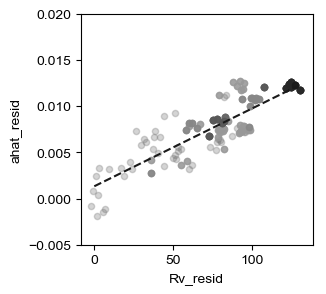

0.7764147999208992


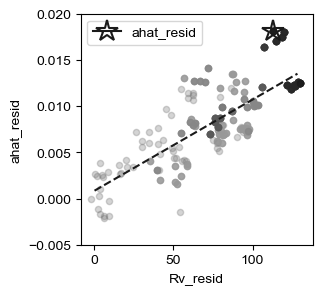

135

In [422]:
#9       16641651        16787775        60.03615289     0.8274072460373496      104

#'rs10962612' #16804167

window = plotWindowOfInterest('Sunburn', 9, 16641651,16787775,snp_list=['rs10962612'], figsize_tuple=(3,3))

window = plotWindowOfInterest('Sunburn', 9, 16641651-20000,16787775+20000,snp_list=['rs10962612'], figsize_tuple=(3,3), saveFig=True)
len(window)


### ASB1 - Chronotype

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


-0.9203129591077106


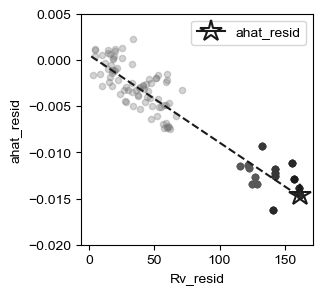

96

In [418]:
#chr2    239292973       239382296       107.27987776    -0.9297335529600086     49
#chr2    239398170       239456308       74.46136680999997       -0.9844137352964814     28
#chr2    239457097       239488435       62.39894049000001       -0.7875283692175723     17
#other papers: rs3191996, rs75804782
# rs75804782 not in SLDP snps, but R2=.801, D'=.924 with rs3191996 in europeans
window = plotWindowOfInterest('MorningPerson', 2, 239292973,239488435,snp_list=['rs3191996'], figsize_tuple=(3,3), saveFig=True)
len(window)

### NMUR2

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0.9114646240278785


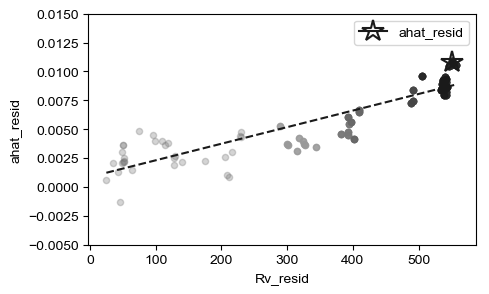

88

In [424]:
#chr5    151826774       151931514       48.57393024999998       0.880867606073815       52
#chr5    152478626       152522916       45.75440164000001       0.7375082821532116      21
#chr5    152561058       152597826       45.12614976     0.9591181549613651      17
#chr5    151745423       151793214       38.229489       0.9278909053645944      24
#chr5    151640202       151701722       37.751193639999975      0.8634544190646017      32
#chr5    152345492       152390478       34.31264929     0.8966024999916852      19
#chr5    152703834       152752575       34.26112089     0.7925176973125257      21
#chr5    151480543       151537878       26.43707889     0.7515163554959274      34

window = plotWindowOfInterest('MorningPerson', 5, 151745423,151931514, snp_list=['rs4958561'], figsize_tuple=(5,3), saveFig=True)

len(window)



In [141]:
window[window['ahat_resid'] == window[window['SNP'].isin(nean_variants['SNP'])]['ahat_resid'].max()]

,CHR,SNP,CM,BP,A1,A2,ahat,N,minor1.R,minor2.R,minor3.R,minor4.R,minor5.R,introgressed.R,chi2,Rv,ahat_resid,Rv_resid,typed,significant
417949,5,rs4958561,163.21181,151930231,G,A,0.010659,410520.0,-0.658564,-7.116023,-12.240816,306.168562,109.764766,582.201842,46.637973,582.201842,0.010479,554.028196,True,True


### GRB10

/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/dors/capra_lab/users/evonne/resources/conda_envs/envs/evonne3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


-0.8379188652316419


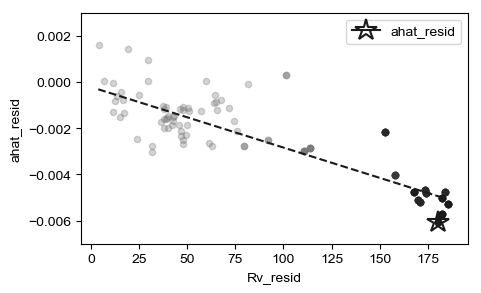

In [426]:

#7       50649920        50739129        15.176478490000004      -0.8379188652316419     74
window = plotWindowOfInterest('AutoimmuneDz', 7, 50649920,50739129, snp_list=['rs17544225'], figsize_tuple=(5,3), saveFig=True) #'rs73129084'



In [128]:
window[window['ahat_resid'] == window['ahat_resid'].min()]

,CHR,SNP,CM,BP,A1,A2,ahat,N,minor1.R,minor2.R,minor3.R,minor4.R,minor5.R,introgressed.R,chi2,Rv,ahat_resid,Rv_resid,typed,significant
529155,7,rs17544225,76.748445,50688054,C,T,-0.005748,459324.0,0.009897,-0.158232,87.844046,20.27526,8.692083,209.667915,15.176478,209.667915,-0.00573,182.677643,True,False


## Discussion

In [7]:
sldp = pd.read_csv("/dors/capra_lab/users/evonne/SLDP/results/" + name + "/aggregate.results", delim_whitespace=True)
sldp.index = sldp['pheno']
traits8 = ['AutoimmuneDz','Balding','MenopauseAge','Sunburn','FVC','Heel_T_Score','MorningPerson','WBCCount']

sldp.loc[traits_41]

,annot,pheno,z,p,mu,se(mu),h2g,rf,h2v/h2g,h2v,supp(v)/M
pheno,,,,,,,,,,,
Resp_ENT_Dz,introgressed.R,Resp_ENT_Dz,-1.018353,0.308510,-2.250618e-07,2.210244e-07,0.051792,-0.000565,1.354947e-07,7.017593e-09,0.047863
SmokingStatus,introgressed.R,SmokingStatus,-1.232801,0.217650,-4.480646e-07,3.571884e-07,0.096462,-0.000824,4.214452e-07,4.065325e-08,0.047863
RDW,introgressed.R,RDW,0.766095,0.443620,9.214708e-07,1.001709e-06,0.233202,0.001090,3.506297e-07,8.176769e-08,0.047863
Hypothyroidism,introgressed.R,Hypothyroidism,1.471559,0.141140,4.288537e-07,2.847948e-07,0.050803,0.001086,8.699435e-07,4.419605e-08,0.047863
HDL,introgressed.R,HDL,1.037528,0.299490,5.577341e-07,5.654201e-07,0.072632,0.001182,5.406411e-07,3.926759e-08,0.047863
MorningPerson,introgressed.R,MorningPerson,0.591165,0.554410,1.802850e-07,3.024882e-07,0.098512,0.000328,-7.300011e-08,-7.191398e-09,0.047863
CrohnsDz,introgressed.R,CrohnsDz,-0.666017,0.505400,-1.131490e-06,1.654126e-06,0.517078,-0.000898,-2.214710e-07,-1.145179e-07,0.047863
RA,introgressed.R,RA,1.422401,0.154910,1.043906e-06,7.065034e-07,0.194676,0.001351,1.326627e-06,2.582623e-07,0.047863
RBCCount,introgressed.R,RBCCount,1.364278,0.172480,1.332777e-06,1.133237e-06,0.263652,0.001482,1.249676e-06,3.294793e-07,0.047863


In [124]:
#SLDP results and LDSC results combined
enr = partitioned_h2("introgressedSNPs").enr()[['ALLEUR_NMATCH_sprime_results.bed']]
stderr = partitioned_h2("introgressedSNPs").stderr()[['ALLEUR_NMATCH_sprime_results.bed']]
p = partitioned_h2("introgressedSNPs").pval()[['ALLEUR_NMATCH_sprime_results.bed']]
enr = pd.concat([enr,stderr,p],axis=1)
enr = enr.reset_index()
enr.columns = ['pheno','partitioned h2','partitioned h2 stderr','partitioned h2 P']
name = 'ALLEUR_NMATCH_LDexpanded_r2_2_LDSCtraits'
sldp = pd.read_csv("/dors/capra_lab/users/evonne/SLDP/results/" + name + "/aggregate.results", delim_whitespace=True)

enr.merge(sldp, on='pheno').sort_values(['partitioned h2'],ascending=False)
#sldp.head()
#enr.head()
#sldp_and_enr = pd.concat([enr,sldp.loc[traits_41]['z','p']],axis=1)
#sldp_and_enr.loc[traits_41]

,pheno,partitioned h2,partitioned h2 stderr,partitioned h2 P,annot,z,p,mu,se(mu),h2g,rf,h2v/h2g,h2v,supp(v)/M
9,AutoimmuneDz,3.933534,1.475043,0.028079,introgressed.R,1.063225,0.287680,2.113428e-07,2.027366e-07,0.030000,0.000697,-6.361788e-07,-1.908536e-08,0.047863
39,Balding,2.269159,0.698688,0.068322,introgressed.R,0.188557,0.850440,1.334556e-06,1.995800e-06,0.251100,0.001521,-7.713873e-07,-1.936952e-07,0.047863
13,MenopauseAge,2.204535,1.147636,0.292534,introgressed.R,-1.029404,0.303290,-5.582367e-07,5.378495e-07,0.123780,-0.000906,3.664895e-07,4.536412e-08,0.047863
7,Sunburn,2.078177,0.864611,0.208197,introgressed.R,3.170647,0.001521,9.944524e-07,2.980469e-07,0.097598,0.001818,3.126786e-06,3.051667e-07,0.047863
4,HairColor,1.935420,1.276693,0.464564,introgressed.R,-0.626556,0.530950,-5.327603e-07,6.593010e-07,0.403427,-0.000479,1.991646e-08,8.034847e-09,0.047863
37,SkinColor,1.883494,1.363092,0.507904,introgressed.R,0.872859,0.382740,3.450699e-07,4.225175e-07,0.188403,0.000454,2.184768e-08,4.116164e-09,0.047863
28,FVC,1.818555,0.447616,0.068588,introgressed.R,-0.154735,0.877030,-4.407584e-07,1.083411e-06,0.219958,-0.000537,-7.495046e-07,-1.648594e-07,0.047863
5,Heel_T_Score,1.779709,0.499209,0.126291,introgressed.R,-1.175237,0.239900,-7.745674e-07,6.432199e-07,0.377804,-0.000720,3.048581e-07,1.151765e-07,0.047863
11,Tanning,1.752226,1.450610,0.592334,introgressed.R,-1.760695,0.078290,-6.064763e-07,3.382854e-07,0.181759,-0.000812,5.373889e-07,9.767538e-08,0.047863
24,MorningPerson,1.625050,0.458153,0.174077,introgressed.R,0.591165,0.554410,1.802850e-07,3.024882e-07,0.098512,0.000328,-7.300011e-08,-7.191398e-09,0.047863
